In [40]:
import numpy as np
import pandas as pd
import glob

path_to_gff = 'Data/Functional/gff/'
path_to_metadata = 'Metadata/MTG_metadata.tsv'

def CountAnnot(sample, annot_col, ecosystem):
    count = 0
    no_annot_count = 0
    KEGG_count = 0
    Pfam_count = 0
    dbCAN_count = 0
    Resfams_count = 0
    
    for i in annot_col:
        count += 1
        if 'KEGG=' in i:
            KEGG_count += 1
        if 'Pfam_A=' in i:
            Pfam_count += 1
        if 'dbCAN=' in i:
            dbCAN_count += 1
        if 'Resfams' in i:
            Resfams_count += 1
        if ('KEGG=' not in i) & ('Pfam_A=' not in i) & ('dbCAN=' not in i) & ('Resfams' not in i):
            no_annot_count += 1
    
    return([{'Sample':sample, 'Ecosystem':ecosystem, 'Type':'Gene_count',    'Value':count}, 
            {'Sample':sample, 'Ecosystem':ecosystem, 'Type':'No_annotation', 'Value':no_annot_count/count}, 
            {'Sample':sample, 'Ecosystem':ecosystem, 'Type':'KEGG',          'Value':KEGG_count/count}, 
            {'Sample':sample, 'Ecosystem':ecosystem, 'Type':'Pfam',          'Value':Pfam_count/count},
            {'Sample':sample, 'Ecosystem':ecosystem, 'Type':'dbCAN',         'Value':dbCAN_count/count},
            {'Sample':sample, 'Ecosystem':ecosystem, 'Type':'Resfams',       'Value':Resfams_count/count}])
    
metadata = pd.read_csv(path_to_metadata, sep='\t')
samples = metadata['Sample'].values
gff_files = glob.glob(path_to_gff + '*')
counts_df = pd.DataFrame(columns=['Sample','Ecosystem','Type','Value'])
for file in gff_files:
    sample_name = file.lstrip(path_to_gff).rstrip('_annotation_CDS_RNA_hmms.gff')
    if sample_name in samples:
        print(sample_name)
        sample_row = np.where(metadata['Sample']==sample_name)
        euci_sample = str(metadata['EUCI'].values[sample_row]).lstrip("['").rstrip("']")
        
        if euci_sample == 'Yes':
            ecosystem = 'EUCI' 
        else:
            ecosystem = str(metadata['Ecosystem'].values[sample_row]).lstrip("['").rstrip("']")
        
        gff_file = pd.read_csv(file, sep='\t', header=None)
        for count_dict in  CountAnnot(sample_name, gff_file[8], ecosystem):
            counts_df = counts_df.append(count_dict,ignore_index=True)

counts_df.to_csv('9_Unassigned_genes/Annotation_comparison.csv', sep=',', index=False)

ERR1726808
SRR7691720
ERR1801634
SRR5275897
SRR7344002
SRR5468105
SRR5275927
SRR7091382
SRR11582149
SRR11601863
ERR1801631
SRR5857945
SRR11601551
SRR6263322
SRR11602043
SRR7962857
SRR10947776
SRR8581483
SRR11582155
SRR5275904
SRR8842248
SRR11601608
SRR6221002
SRR11601791
SRR5275919
SRR10857623
ERR1801630
SRR5468112
SRR5857944
SRR7962866
SRR11582164
SRR10948645
SRR11582142
SRR7962856
SRR11601839
ERR3130419
SRR11582147
SRR6231314
SRR5275900
SRR11582151
SRR5891571
SRR11601852
SRR11601607
SRR6263259
SRR11602041
SRR5275903
SRR8581484
ERR1726800
SRR5468108
SRR6263655
ERR1726751
SRR7962855
SRR5468517
SRR11582139
SRR5275906
ERR558441
SRR11582157
SRR7344000
SRR7962860
SRR5275925
SRR5468107
SRR7617220
SRR10857620
ERR476714
SRR5468111
SRR11601881
ERR1801633
SRR6231313
SRR5275907
SRR7962754
SRR11582145
SRR11602038
SRR11582153
SRR5275902
SRR6263654
SRR5468109
SRR11635883
SRR7344001
SRR5468106
ERR1800786
SRR10857621
SRR7691719
SRR5468110
ERR505054
SRR11582170
SRR7962864
SRR5275908
SRR6266334
SRR5857

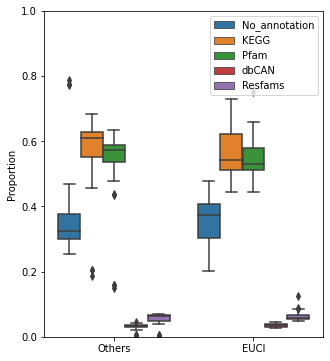

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

counts_df = pd.read_csv('9_Unassigned_genes/Annotation_comparison.csv', sep=',')
counts_df['EUCI'] = 'Others'
counts_df.loc[counts_df.Ecosystem =='EUCI', 'EUCI'] = 'EUCI'

f, ax = plt.subplots(figsize=(5, 6))
sns.boxplot(x="EUCI", y="Value", hue="Type",data=counts_df[counts_df['Type'] != 'Gene_count'], ax=ax)
plt.ylabel('Proportion')
plt.xlabel('')
plt.legend(loc='upper right') 
plt.ylim(0,1)
plt.savefig('9_Unassigned_genes/Annotation_comparison.pdf')
plt.show()
plt.close()

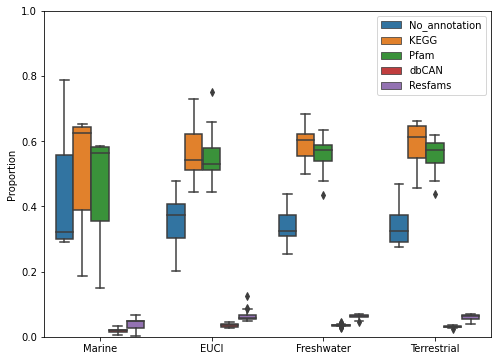

In [4]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="Ecosystem", y="Value", hue="Type",data=counts_df[counts_df['Type'] != 'Gene_count'], ax=ax)
plt.ylabel('Proportion')
plt.xlabel('')
plt.legend(loc='upper right') 
plt.ylim(0,1)
plt.savefig('9_Unassigned_genes/Annotation_comparison.pdf')
plt.show()
plt.close()

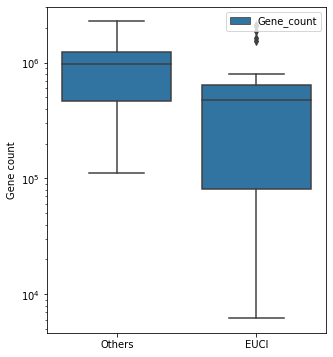

In [4]:
f, ax = plt.subplots(figsize=(5, 6))
sns.boxplot(x="EUCI", y="Value", hue="Type",data=counts_df[counts_df['Type'] == 'Gene_count'], ax=ax)
ax.set(yscale="log")
plt.ylabel('Gene count')
plt.xlabel('')
plt.legend(loc='upper right') 
plt.savefig('9_Unassigned_genes/Gene_count_comparison.pdf')
plt.show()
plt.close()

In [3]:
No_annot_df = counts_df[counts_df['Type']=='No_annotation']
KEGG_annot = counts_df[counts_df['Type']=='KEGG']
print('EUCI KEGG assigned proportion mean: {}'.format(np.mean(KEGG_annot[KEGG_annot['Ecosystem'] == 'EUCI']['Value'])))

print('EUCI unassigned proportion mean: {}'.format(np.mean(No_annot_df[No_annot_df['Ecosystem'] == 'EUCI']['Value'])))
print('EUCI unassigned proportion median: {}'.format(np.median(No_annot_df[No_annot_df['Ecosystem'] == 'EUCI']['Value'])))
print('Others unassigned proportion mean: {}'.format(np.mean(No_annot_df[No_annot_df['Ecosystem'].isin(['Terrestrial','Freshwater','Marine'])]['Value'])))
print('Others unassigned proportion median: {}'.format(np.median(No_annot_df[No_annot_df['Ecosystem'].isin(['Terrestrial','Freshwater','Marine'])]['Value'])))


EUCI KEGG assigned proportion mean: 0.5661753729998752
EUCI unassigned proportion mean: 0.35858088604658384
EUCI unassigned proportion median: 0.3729756452364447
Others unassigned proportion mean: 0.3572964258223431
Others unassigned proportion median: 0.323308746343748


In [9]:
import scipy.stats as stats
stats.ranksums(No_annot_df[No_annot_df['Ecosystem'] == 'EUCI']['Value'], No_annot_df[No_annot_df['Ecosystem'].isin(['Terrestrial','Freshwater','Marine'])]['Value'])


RanksumsResult(statistic=1.2970771182072223, pvalue=0.19460465368422764)

## 2. Unassigned gene clusters statistics

In [2]:
import pandas as pd
import numpy as np

def ParseClusterStats(file):
    row_count = 0
    df = pd.DataFrame(columns=['ClusterID','SeqNum', 'meanSeqLen', 'meanGC', 'meanPID', 'stdSeqLen', 'stdGC', 'stdPID'])
    with open(file,'r') as f:
        for line in f.readlines():
            if line.startswith('=='):
                print(line)
                if row_count == 0:
                    row_count += 1
                    cluster_id = line.lstrip('==> ').rstrip('_len_GC_PID.txt <==\n')
                    continue
                else:
                    print(row_count)
                    df = df.append({'ClusterID': cluster_id,'SeqNum': SeqNum,   'meanSeqLen': meanSeqLen, 'meanGC': meanGC, 
                                    'meanPID': meanPID, 'stdSeqLen': stdSeqLen,   'stdGC': stdGC, 
                                    'stdPID': stdPID}, ignore_index=True)
                    
                    row_count += 1
                    cluster_id = line.lstrip('==> ').rstrip('_len_GC_PID.txt <==\n')
            if line.startswith('count'):
                SeqNum = line.split('\t')[1]
            if line.startswith('mean'):
                meanSeqLen = line.split('\t')[1]
                meanGC = line.split('\t')[2]
                meanPID = line.split('\t')[3].rstrip('\n')
            if line.startswith('std'):
                stdSeqLen = line.split('\t')[1]
                stdGC = line.split('\t')[2]
                stdPID = line.split('\t')[3].rstrip('\n')

    return(df)

stats_df = ParseClusterStats('Data/Unassigned_clusters_stats.txt')

==> Cluster_0_len_GC_PID.txt <==

==> Cluster_10000_len_GC_PID.txt <==

1
==> Cluster_10001_len_GC_PID.txt <==

2
==> Cluster_10002_len_GC_PID.txt <==

3
==> Cluster_10003_len_GC_PID.txt <==

4
==> Cluster_10004_len_GC_PID.txt <==

5
==> Cluster_10005_len_GC_PID.txt <==

6
==> Cluster_10006_len_GC_PID.txt <==

7
==> Cluster_10007_len_GC_PID.txt <==

8
==> Cluster_10008_len_GC_PID.txt <==

9
==> Cluster_10009_len_GC_PID.txt <==

10
==> Cluster_1000_len_GC_PID.txt <==

11
==> Cluster_10010_len_GC_PID.txt <==

12
==> Cluster_10011_len_GC_PID.txt <==

13
==> Cluster_10012_len_GC_PID.txt <==

14
==> Cluster_10013_len_GC_PID.txt <==

15
==> Cluster_10014_len_GC_PID.txt <==

16
==> Cluster_10015_len_GC_PID.txt <==

17
==> Cluster_10016_len_GC_PID.txt <==

18
==> Cluster_10017_len_GC_PID.txt <==

19
==> Cluster_10018_len_GC_PID.txt <==

20
==> Cluster_10019_len_GC_PID.txt <==

21
==> Cluster_1001_len_GC_PID.txt <==

22
==> Cluster_10020_len_GC_PID.txt <==

23
==> Cluster_10021_len_GC_PID.txt <


210
==> Cluster_10190_len_GC_PID.txt <==

211
==> Cluster_10191_len_GC_PID.txt <==

212
==> Cluster_10192_len_GC_PID.txt <==

213
==> Cluster_10193_len_GC_PID.txt <==

214
==> Cluster_10194_len_GC_PID.txt <==

215
==> Cluster_10195_len_GC_PID.txt <==

216
==> Cluster_10196_len_GC_PID.txt <==

217
==> Cluster_10197_len_GC_PID.txt <==

218
==> Cluster_10198_len_GC_PID.txt <==

219
==> Cluster_10199_len_GC_PID.txt <==

220
==> Cluster_1019_len_GC_PID.txt <==

221
==> Cluster_101_len_GC_PID.txt <==

222
==> Cluster_10200_len_GC_PID.txt <==

223
==> Cluster_10201_len_GC_PID.txt <==

224
==> Cluster_10202_len_GC_PID.txt <==

225
==> Cluster_10203_len_GC_PID.txt <==

226
==> Cluster_10204_len_GC_PID.txt <==

227
==> Cluster_10205_len_GC_PID.txt <==

228
==> Cluster_10206_len_GC_PID.txt <==

229
==> Cluster_10207_len_GC_PID.txt <==

230
==> Cluster_10208_len_GC_PID.txt <==

231
==> Cluster_10209_len_GC_PID.txt <==

232
==> Cluster_1020_len_GC_PID.txt <==

233
==> Cluster_10210_len_GC_PID.txt 


452
==> Cluster_10408_len_GC_PID.txt <==

453
==> Cluster_10409_len_GC_PID.txt <==

454
==> Cluster_1040_len_GC_PID.txt <==

455
==> Cluster_10410_len_GC_PID.txt <==

456
==> Cluster_10411_len_GC_PID.txt <==

457
==> Cluster_10412_len_GC_PID.txt <==

458
==> Cluster_10413_len_GC_PID.txt <==

459
==> Cluster_10414_len_GC_PID.txt <==

460
==> Cluster_10415_len_GC_PID.txt <==

461
==> Cluster_10416_len_GC_PID.txt <==

462
==> Cluster_10417_len_GC_PID.txt <==

463
==> Cluster_10418_len_GC_PID.txt <==

464
==> Cluster_10419_len_GC_PID.txt <==

465
==> Cluster_1041_len_GC_PID.txt <==

466
==> Cluster_10420_len_GC_PID.txt <==

467
==> Cluster_10421_len_GC_PID.txt <==

468
==> Cluster_10422_len_GC_PID.txt <==

469
==> Cluster_10423_len_GC_PID.txt <==

470
==> Cluster_10424_len_GC_PID.txt <==

471
==> Cluster_10425_len_GC_PID.txt <==

472
==> Cluster_10426_len_GC_PID.txt <==

473
==> Cluster_10427_len_GC_PID.txt <==

474
==> Cluster_10428_len_GC_PID.txt <==

475
==> Cluster_10429_len_GC_PID.tx


675
==> Cluster_10609_len_GC_PID.txt <==

676
==> Cluster_1060_len_GC_PID.txt <==

677
==> Cluster_10610_len_GC_PID.txt <==

678
==> Cluster_10611_len_GC_PID.txt <==

679
==> Cluster_10612_len_GC_PID.txt <==

680
==> Cluster_10613_len_GC_PID.txt <==

681
==> Cluster_10614_len_GC_PID.txt <==

682
==> Cluster_10615_len_GC_PID.txt <==

683
==> Cluster_10616_len_GC_PID.txt <==

684
==> Cluster_10617_len_GC_PID.txt <==

685
==> Cluster_10618_len_GC_PID.txt <==

686
==> Cluster_10619_len_GC_PID.txt <==

687
==> Cluster_1061_len_GC_PID.txt <==

688
==> Cluster_10620_len_GC_PID.txt <==

689
==> Cluster_10621_len_GC_PID.txt <==

690
==> Cluster_10622_len_GC_PID.txt <==

691
==> Cluster_10623_len_GC_PID.txt <==

692
==> Cluster_10624_len_GC_PID.txt <==

693
==> Cluster_10625_len_GC_PID.txt <==

694
==> Cluster_10626_len_GC_PID.txt <==

695
==> Cluster_10627_len_GC_PID.txt <==

696
==> Cluster_10628_len_GC_PID.txt <==

697
==> Cluster_10629_len_GC_PID.txt <==

698
==> Cluster_1062_len_GC_PID.txt


905
==> Cluster_10816_len_GC_PID.txt <==

906
==> Cluster_10817_len_GC_PID.txt <==

907
==> Cluster_10818_len_GC_PID.txt <==

908
==> Cluster_10819_len_GC_PID.txt <==

909
==> Cluster_1081_len_GC_PID.txt <==

910
==> Cluster_10820_len_GC_PID.txt <==

911
==> Cluster_10821_len_GC_PID.txt <==

912
==> Cluster_10822_len_GC_PID.txt <==

913
==> Cluster_10823_len_GC_PID.txt <==

914
==> Cluster_10824_len_GC_PID.txt <==

915
==> Cluster_10825_len_GC_PID.txt <==

916
==> Cluster_10826_len_GC_PID.txt <==

917
==> Cluster_10827_len_GC_PID.txt <==

918
==> Cluster_10828_len_GC_PID.txt <==

919
==> Cluster_10829_len_GC_PID.txt <==

920
==> Cluster_1082_len_GC_PID.txt <==

921
==> Cluster_10830_len_GC_PID.txt <==

922
==> Cluster_10831_len_GC_PID.txt <==

923
==> Cluster_10832_len_GC_PID.txt <==

924
==> Cluster_10833_len_GC_PID.txt <==

925
==> Cluster_10834_len_GC_PID.txt <==

926
==> Cluster_10835_len_GC_PID.txt <==

927
==> Cluster_10836_len_GC_PID.txt <==

928
==> Cluster_10837_len_GC_PID.tx


1158
==> Cluster_11043_len_GC_PID.txt <==

1159
==> Cluster_11044_len_GC_PID.txt <==

1160
==> Cluster_11045_len_GC_PID.txt <==

1161
==> Cluster_11046_len_GC_PID.txt <==

1162
==> Cluster_11047_len_GC_PID.txt <==

1163
==> Cluster_11048_len_GC_PID.txt <==

1164
==> Cluster_11049_len_GC_PID.txt <==

1165
==> Cluster_1104_len_GC_PID.txt <==

1166
==> Cluster_11050_len_GC_PID.txt <==

1167
==> Cluster_11051_len_GC_PID.txt <==

1168
==> Cluster_11052_len_GC_PID.txt <==

1169
==> Cluster_11053_len_GC_PID.txt <==

1170
==> Cluster_11054_len_GC_PID.txt <==

1171
==> Cluster_11055_len_GC_PID.txt <==

1172
==> Cluster_11056_len_GC_PID.txt <==

1173
==> Cluster_11057_len_GC_PID.txt <==

1174
==> Cluster_11058_len_GC_PID.txt <==

1175
==> Cluster_11059_len_GC_PID.txt <==

1176
==> Cluster_1105_len_GC_PID.txt <==

1177
==> Cluster_11060_len_GC_PID.txt <==

1178
==> Cluster_11061_len_GC_PID.txt <==

1179
==> Cluster_11062_len_GC_PID.txt <==

1180
==> Cluster_11063_len_GC_PID.txt <==

1181
==> Clu


1385
==> Cluster_11248_len_GC_PID.txt <==

1386
==> Cluster_11249_len_GC_PID.txt <==

1387
==> Cluster_1124_len_GC_PID.txt <==

1388
==> Cluster_11250_len_GC_PID.txt <==

1389
==> Cluster_11251_len_GC_PID.txt <==

1390
==> Cluster_11252_len_GC_PID.txt <==

1391
==> Cluster_11253_len_GC_PID.txt <==

1392
==> Cluster_11254_len_GC_PID.txt <==

1393
==> Cluster_11255_len_GC_PID.txt <==

1394
==> Cluster_11256_len_GC_PID.txt <==

1395
==> Cluster_11257_len_GC_PID.txt <==

1396
==> Cluster_11258_len_GC_PID.txt <==

1397
==> Cluster_11259_len_GC_PID.txt <==

1398
==> Cluster_1125_len_GC_PID.txt <==

1399
==> Cluster_11260_len_GC_PID.txt <==

1400
==> Cluster_11261_len_GC_PID.txt <==

1401
==> Cluster_11262_len_GC_PID.txt <==

1402
==> Cluster_11263_len_GC_PID.txt <==

1403
==> Cluster_11264_len_GC_PID.txt <==

1404
==> Cluster_11265_len_GC_PID.txt <==

1405
==> Cluster_11266_len_GC_PID.txt <==

1406
==> Cluster_11267_len_GC_PID.txt <==

1407
==> Cluster_11268_len_GC_PID.txt <==

1408
==> Clu


1626
==> Cluster_11465_len_GC_PID.txt <==

1627
==> Cluster_11466_len_GC_PID.txt <==

1628
==> Cluster_11467_len_GC_PID.txt <==

1629
==> Cluster_11468_len_GC_PID.txt <==

1630
==> Cluster_11469_len_GC_PID.txt <==

1631
==> Cluster_1146_len_GC_PID.txt <==

1632
==> Cluster_11470_len_GC_PID.txt <==

1633
==> Cluster_11471_len_GC_PID.txt <==

1634
==> Cluster_11472_len_GC_PID.txt <==

1635
==> Cluster_11473_len_GC_PID.txt <==

1636
==> Cluster_11474_len_GC_PID.txt <==

1637
==> Cluster_11475_len_GC_PID.txt <==

1638
==> Cluster_11476_len_GC_PID.txt <==

1639
==> Cluster_11477_len_GC_PID.txt <==

1640
==> Cluster_11478_len_GC_PID.txt <==

1641
==> Cluster_11479_len_GC_PID.txt <==

1642
==> Cluster_1147_len_GC_PID.txt <==

1643
==> Cluster_11480_len_GC_PID.txt <==

1644
==> Cluster_11481_len_GC_PID.txt <==

1645
==> Cluster_11482_len_GC_PID.txt <==

1646
==> Cluster_11483_len_GC_PID.txt <==

1647
==> Cluster_11484_len_GC_PID.txt <==

1648
==> Cluster_11485_len_GC_PID.txt <==

1649
==> Clu


1820
==> Cluster_1163_len_GC_PID.txt <==

1821
==> Cluster_11640_len_GC_PID.txt <==

1822
==> Cluster_11641_len_GC_PID.txt <==

1823
==> Cluster_11642_len_GC_PID.txt <==

1824
==> Cluster_11643_len_GC_PID.txt <==

1825
==> Cluster_11644_len_GC_PID.txt <==

1826
==> Cluster_11645_len_GC_PID.txt <==

1827
==> Cluster_11646_len_GC_PID.txt <==

1828
==> Cluster_11647_len_GC_PID.txt <==

1829
==> Cluster_11648_len_GC_PID.txt <==

1830
==> Cluster_11649_len_GC_PID.txt <==

1831
==> Cluster_1164_len_GC_PID.txt <==

1832
==> Cluster_11650_len_GC_PID.txt <==

1833
==> Cluster_11651_len_GC_PID.txt <==

1834
==> Cluster_11652_len_GC_PID.txt <==

1835
==> Cluster_11653_len_GC_PID.txt <==

1836
==> Cluster_11654_len_GC_PID.txt <==

1837
==> Cluster_11655_len_GC_PID.txt <==

1838
==> Cluster_11656_len_GC_PID.txt <==

1839
==> Cluster_11657_len_GC_PID.txt <==

1840
==> Cluster_11658_len_GC_PID.txt <==

1841
==> Cluster_11659_len_GC_PID.txt <==

1842
==> Cluster_1165_len_GC_PID.txt <==

1843
==> Clus


2074
==> Cluster_11869_len_GC_PID.txt <==

2075
==> Cluster_1186_len_GC_PID.txt <==

2076
==> Cluster_11870_len_GC_PID.txt <==

2077
==> Cluster_11871_len_GC_PID.txt <==

2078
==> Cluster_11872_len_GC_PID.txt <==

2079
==> Cluster_11873_len_GC_PID.txt <==

2080
==> Cluster_11874_len_GC_PID.txt <==

2081
==> Cluster_11875_len_GC_PID.txt <==

2082
==> Cluster_11876_len_GC_PID.txt <==

2083
==> Cluster_11877_len_GC_PID.txt <==

2084
==> Cluster_11878_len_GC_PID.txt <==

2085
==> Cluster_11879_len_GC_PID.txt <==

2086
==> Cluster_1187_len_GC_PID.txt <==

2087
==> Cluster_11880_len_GC_PID.txt <==

2088
==> Cluster_11881_len_GC_PID.txt <==

2089
==> Cluster_11882_len_GC_PID.txt <==

2090
==> Cluster_11883_len_GC_PID.txt <==

2091
==> Cluster_11884_len_GC_PID.txt <==

2092
==> Cluster_11885_len_GC_PID.txt <==

2093
==> Cluster_11886_len_GC_PID.txt <==

2094
==> Cluster_11887_len_GC_PID.txt <==

2095
==> Cluster_11888_len_GC_PID.txt <==

2096
==> Cluster_11889_len_GC_PID.txt <==

2097
==> Clu


2320
==> Cluster_1208_len_GC_PID.txt <==

2321
==> Cluster_12090_len_GC_PID.txt <==

2322
==> Cluster_12091_len_GC_PID.txt <==

2323
==> Cluster_12092_len_GC_PID.txt <==

2324
==> Cluster_12093_len_GC_PID.txt <==

2325
==> Cluster_12094_len_GC_PID.txt <==

2326
==> Cluster_12095_len_GC_PID.txt <==

2327
==> Cluster_12096_len_GC_PID.txt <==

2328
==> Cluster_12097_len_GC_PID.txt <==

2329
==> Cluster_12098_len_GC_PID.txt <==

2330
==> Cluster_12099_len_GC_PID.txt <==

2331
==> Cluster_1209_len_GC_PID.txt <==

2332
==> Cluster_120_len_GC_PID.txt <==

2333
==> Cluster_12100_len_GC_PID.txt <==

2334
==> Cluster_12101_len_GC_PID.txt <==

2335
==> Cluster_12102_len_GC_PID.txt <==

2336
==> Cluster_12103_len_GC_PID.txt <==

2337
==> Cluster_12104_len_GC_PID.txt <==

2338
==> Cluster_12105_len_GC_PID.txt <==

2339
==> Cluster_12106_len_GC_PID.txt <==

2340
==> Cluster_12107_len_GC_PID.txt <==

2341
==> Cluster_12108_len_GC_PID.txt <==

2342
==> Cluster_12109_len_GC_PID.txt <==

2343
==> Clust


2535
==> Cluster_12283_len_GC_PID.txt <==

2536
==> Cluster_12284_len_GC_PID.txt <==

2537
==> Cluster_12285_len_GC_PID.txt <==

2538
==> Cluster_12286_len_GC_PID.txt <==

2539
==> Cluster_12287_len_GC_PID.txt <==

2540
==> Cluster_12288_len_GC_PID.txt <==

2541
==> Cluster_12289_len_GC_PID.txt <==

2542
==> Cluster_1228_len_GC_PID.txt <==

2543
==> Cluster_12290_len_GC_PID.txt <==

2544
==> Cluster_12291_len_GC_PID.txt <==

2545
==> Cluster_12292_len_GC_PID.txt <==

2546
==> Cluster_12293_len_GC_PID.txt <==

2547
==> Cluster_12294_len_GC_PID.txt <==

2548
==> Cluster_12295_len_GC_PID.txt <==

2549
==> Cluster_12296_len_GC_PID.txt <==

2550
==> Cluster_12297_len_GC_PID.txt <==

2551
==> Cluster_12298_len_GC_PID.txt <==

2552
==> Cluster_12299_len_GC_PID.txt <==

2553
==> Cluster_1229_len_GC_PID.txt <==

2554
==> Cluster_122_len_GC_PID.txt <==

2555
==> Cluster_12300_len_GC_PID.txt <==

2556
==> Cluster_12301_len_GC_PID.txt <==

2557
==> Cluster_12302_len_GC_PID.txt <==

2558
==> Clust


2757
==> Cluster_12483_len_GC_PID.txt <==

2758
==> Cluster_12484_len_GC_PID.txt <==

2759
==> Cluster_12485_len_GC_PID.txt <==

2760
==> Cluster_12486_len_GC_PID.txt <==

2761
==> Cluster_12487_len_GC_PID.txt <==

2762
==> Cluster_12488_len_GC_PID.txt <==

2763
==> Cluster_12489_len_GC_PID.txt <==

2764
==> Cluster_1248_len_GC_PID.txt <==

2765
==> Cluster_12490_len_GC_PID.txt <==

2766
==> Cluster_12491_len_GC_PID.txt <==

2767
==> Cluster_12492_len_GC_PID.txt <==

2768
==> Cluster_12493_len_GC_PID.txt <==

2769
==> Cluster_12494_len_GC_PID.txt <==

2770
==> Cluster_12495_len_GC_PID.txt <==

2771
==> Cluster_12496_len_GC_PID.txt <==

2772
==> Cluster_12497_len_GC_PID.txt <==

2773
==> Cluster_12498_len_GC_PID.txt <==

2774
==> Cluster_12499_len_GC_PID.txt <==

2775
==> Cluster_1249_len_GC_PID.txt <==

2776
==> Cluster_124_len_GC_PID.txt <==

2777
==> Cluster_12500_len_GC_PID.txt <==

2778
==> Cluster_12501_len_GC_PID.txt <==

2779
==> Cluster_12502_len_GC_PID.txt <==

2780
==> Clust


2967
==> Cluster_12672_len_GC_PID.txt <==

2968
==> Cluster_12673_len_GC_PID.txt <==

2969
==> Cluster_12674_len_GC_PID.txt <==

2970
==> Cluster_12675_len_GC_PID.txt <==

2971
==> Cluster_12676_len_GC_PID.txt <==

2972
==> Cluster_12677_len_GC_PID.txt <==

2973
==> Cluster_12678_len_GC_PID.txt <==

2974
==> Cluster_12679_len_GC_PID.txt <==

2975
==> Cluster_1267_len_GC_PID.txt <==

2976
==> Cluster_12680_len_GC_PID.txt <==

2977
==> Cluster_12681_len_GC_PID.txt <==

2978
==> Cluster_12682_len_GC_PID.txt <==

2979
==> Cluster_12683_len_GC_PID.txt <==

2980
==> Cluster_12684_len_GC_PID.txt <==

2981
==> Cluster_12685_len_GC_PID.txt <==

2982
==> Cluster_12686_len_GC_PID.txt <==

2983
==> Cluster_12687_len_GC_PID.txt <==

2984
==> Cluster_12688_len_GC_PID.txt <==

2985
==> Cluster_12689_len_GC_PID.txt <==

2986
==> Cluster_1268_len_GC_PID.txt <==

2987
==> Cluster_12690_len_GC_PID.txt <==

2988
==> Cluster_12691_len_GC_PID.txt <==

2989
==> Cluster_12692_len_GC_PID.txt <==

2990
==> Clu


3206
==> Cluster_12888_len_GC_PID.txt <==

3207
==> Cluster_12889_len_GC_PID.txt <==

3208
==> Cluster_1288_len_GC_PID.txt <==

3209
==> Cluster_12890_len_GC_PID.txt <==

3210
==> Cluster_12891_len_GC_PID.txt <==

3211
==> Cluster_12892_len_GC_PID.txt <==

3212
==> Cluster_12893_len_GC_PID.txt <==

3213
==> Cluster_12894_len_GC_PID.txt <==

3214
==> Cluster_12895_len_GC_PID.txt <==

3215
==> Cluster_12896_len_GC_PID.txt <==

3216
==> Cluster_12897_len_GC_PID.txt <==

3217
==> Cluster_12898_len_GC_PID.txt <==

3218
==> Cluster_12899_len_GC_PID.txt <==

3219
==> Cluster_1289_len_GC_PID.txt <==

3220
==> Cluster_128_len_GC_PID.txt <==

3221
==> Cluster_12900_len_GC_PID.txt <==

3222
==> Cluster_12901_len_GC_PID.txt <==

3223
==> Cluster_12902_len_GC_PID.txt <==

3224
==> Cluster_12903_len_GC_PID.txt <==

3225
==> Cluster_12904_len_GC_PID.txt <==

3226
==> Cluster_12905_len_GC_PID.txt <==

3227
==> Cluster_12906_len_GC_PID.txt <==

3228
==> Cluster_12907_len_GC_PID.txt <==

3229
==> Clust


3402
==> Cluster_13063_len_GC_PID.txt <==

3403
==> Cluster_13064_len_GC_PID.txt <==

3404
==> Cluster_13065_len_GC_PID.txt <==

3405
==> Cluster_13066_len_GC_PID.txt <==

3406
==> Cluster_13067_len_GC_PID.txt <==

3407
==> Cluster_13068_len_GC_PID.txt <==

3408
==> Cluster_13069_len_GC_PID.txt <==

3409
==> Cluster_1306_len_GC_PID.txt <==

3410
==> Cluster_13070_len_GC_PID.txt <==

3411
==> Cluster_13071_len_GC_PID.txt <==

3412
==> Cluster_13072_len_GC_PID.txt <==

3413
==> Cluster_13073_len_GC_PID.txt <==

3414
==> Cluster_13074_len_GC_PID.txt <==

3415
==> Cluster_13075_len_GC_PID.txt <==

3416
==> Cluster_13076_len_GC_PID.txt <==

3417
==> Cluster_13077_len_GC_PID.txt <==

3418
==> Cluster_13078_len_GC_PID.txt <==

3419
==> Cluster_13079_len_GC_PID.txt <==

3420
==> Cluster_1307_len_GC_PID.txt <==

3421
==> Cluster_13080_len_GC_PID.txt <==

3422
==> Cluster_13081_len_GC_PID.txt <==

3423
==> Cluster_13082_len_GC_PID.txt <==

3424
==> Cluster_13083_len_GC_PID.txt <==

3425
==> Clu


3611
==> Cluster_13251_len_GC_PID.txt <==

3612
==> Cluster_13252_len_GC_PID.txt <==

3613
==> Cluster_13253_len_GC_PID.txt <==

3614
==> Cluster_13254_len_GC_PID.txt <==

3615
==> Cluster_13255_len_GC_PID.txt <==

3616
==> Cluster_13256_len_GC_PID.txt <==

3617
==> Cluster_13257_len_GC_PID.txt <==

3618
==> Cluster_13258_len_GC_PID.txt <==

3619
==> Cluster_13259_len_GC_PID.txt <==

3620
==> Cluster_1325_len_GC_PID.txt <==

3621
==> Cluster_13260_len_GC_PID.txt <==

3622
==> Cluster_13261_len_GC_PID.txt <==

3623
==> Cluster_13262_len_GC_PID.txt <==

3624
==> Cluster_13263_len_GC_PID.txt <==

3625
==> Cluster_13264_len_GC_PID.txt <==

3626
==> Cluster_13265_len_GC_PID.txt <==

3627
==> Cluster_13266_len_GC_PID.txt <==

3628
==> Cluster_13267_len_GC_PID.txt <==

3629
==> Cluster_13268_len_GC_PID.txt <==

3630
==> Cluster_13269_len_GC_PID.txt <==

3631
==> Cluster_1326_len_GC_PID.txt <==

3632
==> Cluster_13270_len_GC_PID.txt <==

3633
==> Cluster_13271_len_GC_PID.txt <==

3634
==> Clu

==> Cluster_13456_len_GC_PID.txt <==

3839
==> Cluster_13457_len_GC_PID.txt <==

3840
==> Cluster_13458_len_GC_PID.txt <==

3841
==> Cluster_13459_len_GC_PID.txt <==

3842
==> Cluster_1345_len_GC_PID.txt <==

3843
==> Cluster_13460_len_GC_PID.txt <==

3844
==> Cluster_13461_len_GC_PID.txt <==

3845
==> Cluster_13462_len_GC_PID.txt <==

3846
==> Cluster_13463_len_GC_PID.txt <==

3847
==> Cluster_13464_len_GC_PID.txt <==

3848
==> Cluster_13465_len_GC_PID.txt <==

3849
==> Cluster_13466_len_GC_PID.txt <==

3850
==> Cluster_13467_len_GC_PID.txt <==

3851
==> Cluster_13468_len_GC_PID.txt <==

3852
==> Cluster_13469_len_GC_PID.txt <==

3853
==> Cluster_1346_len_GC_PID.txt <==

3854
==> Cluster_13470_len_GC_PID.txt <==

3855
==> Cluster_13471_len_GC_PID.txt <==

3856
==> Cluster_13472_len_GC_PID.txt <==

3857
==> Cluster_13473_len_GC_PID.txt <==

3858
==> Cluster_13474_len_GC_PID.txt <==

3859
==> Cluster_13475_len_GC_PID.txt <==

3860
==> Cluster_13476_len_GC_PID.txt <==

3861
==> Cluster_1


4071
==> Cluster_13666_len_GC_PID.txt <==

4072
==> Cluster_13667_len_GC_PID.txt <==

4073
==> Cluster_13668_len_GC_PID.txt <==

4074
==> Cluster_13669_len_GC_PID.txt <==

4075
==> Cluster_1366_len_GC_PID.txt <==

4076
==> Cluster_13670_len_GC_PID.txt <==

4077
==> Cluster_13671_len_GC_PID.txt <==

4078
==> Cluster_13672_len_GC_PID.txt <==

4079
==> Cluster_13673_len_GC_PID.txt <==

4080
==> Cluster_13674_len_GC_PID.txt <==

4081
==> Cluster_13675_len_GC_PID.txt <==

4082
==> Cluster_13676_len_GC_PID.txt <==

4083
==> Cluster_13677_len_GC_PID.txt <==

4084
==> Cluster_13678_len_GC_PID.txt <==

4085
==> Cluster_13679_len_GC_PID.txt <==

4086
==> Cluster_1367_len_GC_PID.txt <==

4087
==> Cluster_13680_len_GC_PID.txt <==

4088
==> Cluster_13681_len_GC_PID.txt <==

4089
==> Cluster_13682_len_GC_PID.txt <==

4090
==> Cluster_13683_len_GC_PID.txt <==

4091
==> Cluster_13684_len_GC_PID.txt <==

4092
==> Cluster_13685_len_GC_PID.txt <==

4093
==> Cluster_13686_len_GC_PID.txt <==

4094
==> Clu


4300
==> Cluster_13872_len_GC_PID.txt <==

4301
==> Cluster_13873_len_GC_PID.txt <==

4302
==> Cluster_13874_len_GC_PID.txt <==

4303
==> Cluster_13875_len_GC_PID.txt <==

4304
==> Cluster_13876_len_GC_PID.txt <==

4305
==> Cluster_13877_len_GC_PID.txt <==

4306
==> Cluster_13878_len_GC_PID.txt <==

4307
==> Cluster_13879_len_GC_PID.txt <==

4308
==> Cluster_1387_len_GC_PID.txt <==

4309
==> Cluster_13880_len_GC_PID.txt <==

4310
==> Cluster_13881_len_GC_PID.txt <==

4311
==> Cluster_13882_len_GC_PID.txt <==

4312
==> Cluster_13883_len_GC_PID.txt <==

4313
==> Cluster_13884_len_GC_PID.txt <==

4314
==> Cluster_13885_len_GC_PID.txt <==

4315
==> Cluster_13886_len_GC_PID.txt <==

4316
==> Cluster_13887_len_GC_PID.txt <==

4317
==> Cluster_13888_len_GC_PID.txt <==

4318
==> Cluster_13889_len_GC_PID.txt <==

4319
==> Cluster_1388_len_GC_PID.txt <==

4320
==> Cluster_13890_len_GC_PID.txt <==

4321
==> Cluster_13891_len_GC_PID.txt <==

4322
==> Cluster_13892_len_GC_PID.txt <==

4323
==> Clu


4528
==> Cluster_14077_len_GC_PID.txt <==

4529
==> Cluster_14078_len_GC_PID.txt <==

4530
==> Cluster_14079_len_GC_PID.txt <==

4531
==> Cluster_1407_len_GC_PID.txt <==

4532
==> Cluster_14080_len_GC_PID.txt <==

4533
==> Cluster_14081_len_GC_PID.txt <==

4534
==> Cluster_14082_len_GC_PID.txt <==

4535
==> Cluster_14083_len_GC_PID.txt <==

4536
==> Cluster_14084_len_GC_PID.txt <==

4537
==> Cluster_14085_len_GC_PID.txt <==

4538
==> Cluster_14086_len_GC_PID.txt <==

4539
==> Cluster_14087_len_GC_PID.txt <==

4540
==> Cluster_14088_len_GC_PID.txt <==

4541
==> Cluster_14089_len_GC_PID.txt <==

4542
==> Cluster_1408_len_GC_PID.txt <==

4543
==> Cluster_14090_len_GC_PID.txt <==

4544
==> Cluster_14091_len_GC_PID.txt <==

4545
==> Cluster_14092_len_GC_PID.txt <==

4546
==> Cluster_14093_len_GC_PID.txt <==

4547
==> Cluster_14094_len_GC_PID.txt <==

4548
==> Cluster_14095_len_GC_PID.txt <==

4549
==> Cluster_14096_len_GC_PID.txt <==

4550
==> Cluster_14097_len_GC_PID.txt <==

4551
==> Clu

==> Cluster_14284_len_GC_PID.txt <==

4759
==> Cluster_14285_len_GC_PID.txt <==

4760
==> Cluster_14286_len_GC_PID.txt <==

4761
==> Cluster_14287_len_GC_PID.txt <==

4762
==> Cluster_14288_len_GC_PID.txt <==

4763
==> Cluster_14289_len_GC_PID.txt <==

4764
==> Cluster_1428_len_GC_PID.txt <==

4765
==> Cluster_14290_len_GC_PID.txt <==

4766
==> Cluster_14291_len_GC_PID.txt <==

4767
==> Cluster_14292_len_GC_PID.txt <==

4768
==> Cluster_14293_len_GC_PID.txt <==

4769
==> Cluster_14294_len_GC_PID.txt <==

4770
==> Cluster_14295_len_GC_PID.txt <==

4771
==> Cluster_14296_len_GC_PID.txt <==

4772
==> Cluster_14297_len_GC_PID.txt <==

4773
==> Cluster_14298_len_GC_PID.txt <==

4774
==> Cluster_14299_len_GC_PID.txt <==

4775
==> Cluster_1429_len_GC_PID.txt <==

4776
==> Cluster_142_len_GC_PID.txt <==

4777
==> Cluster_14300_len_GC_PID.txt <==

4778
==> Cluster_14301_len_GC_PID.txt <==

4779
==> Cluster_14302_len_GC_PID.txt <==

4780
==> Cluster_14303_len_GC_PID.txt <==

4781
==> Cluster_143

==> Cluster_14481_len_GC_PID.txt <==

4978
==> Cluster_14482_len_GC_PID.txt <==

4979
==> Cluster_14483_len_GC_PID.txt <==

4980
==> Cluster_14484_len_GC_PID.txt <==

4981
==> Cluster_14485_len_GC_PID.txt <==

4982
==> Cluster_14486_len_GC_PID.txt <==

4983
==> Cluster_14487_len_GC_PID.txt <==

4984
==> Cluster_14488_len_GC_PID.txt <==

4985
==> Cluster_14489_len_GC_PID.txt <==

4986
==> Cluster_1448_len_GC_PID.txt <==

4987
==> Cluster_14490_len_GC_PID.txt <==

4988
==> Cluster_14491_len_GC_PID.txt <==

4989
==> Cluster_14492_len_GC_PID.txt <==

4990
==> Cluster_14493_len_GC_PID.txt <==

4991
==> Cluster_14494_len_GC_PID.txt <==

4992
==> Cluster_14495_len_GC_PID.txt <==

4993
==> Cluster_14496_len_GC_PID.txt <==

4994
==> Cluster_14497_len_GC_PID.txt <==

4995
==> Cluster_14498_len_GC_PID.txt <==

4996
==> Cluster_14499_len_GC_PID.txt <==

4997
==> Cluster_1449_len_GC_PID.txt <==

4998
==> Cluster_144_len_GC_PID.txt <==

4999
==> Cluster_14500_len_GC_PID.txt <==

5000
==> Cluster_145

==> Cluster_14672_len_GC_PID.txt <==

5190
==> Cluster_14673_len_GC_PID.txt <==

5191
==> Cluster_14674_len_GC_PID.txt <==

5192
==> Cluster_14675_len_GC_PID.txt <==

5193
==> Cluster_14676_len_GC_PID.txt <==

5194
==> Cluster_14677_len_GC_PID.txt <==

5195
==> Cluster_14678_len_GC_PID.txt <==

5196
==> Cluster_14679_len_GC_PID.txt <==

5197
==> Cluster_1467_len_GC_PID.txt <==

5198
==> Cluster_14680_len_GC_PID.txt <==

5199
==> Cluster_14681_len_GC_PID.txt <==

5200
==> Cluster_14682_len_GC_PID.txt <==

5201
==> Cluster_14683_len_GC_PID.txt <==

5202
==> Cluster_14684_len_GC_PID.txt <==

5203
==> Cluster_14685_len_GC_PID.txt <==

5204
==> Cluster_14686_len_GC_PID.txt <==

5205
==> Cluster_14687_len_GC_PID.txt <==

5206
==> Cluster_14688_len_GC_PID.txt <==

5207
==> Cluster_14689_len_GC_PID.txt <==

5208
==> Cluster_1468_len_GC_PID.txt <==

5209
==> Cluster_14690_len_GC_PID.txt <==

5210
==> Cluster_14691_len_GC_PID.txt <==

5211
==> Cluster_14692_len_GC_PID.txt <==

5212
==> Cluster_1

==> Cluster_14881_len_GC_PID.txt <==

5422
==> Cluster_14882_len_GC_PID.txt <==

5423
==> Cluster_14883_len_GC_PID.txt <==

5424
==> Cluster_14884_len_GC_PID.txt <==

5425
==> Cluster_14885_len_GC_PID.txt <==

5426
==> Cluster_14886_len_GC_PID.txt <==

5427
==> Cluster_14887_len_GC_PID.txt <==

5428
==> Cluster_14888_len_GC_PID.txt <==

5429
==> Cluster_14889_len_GC_PID.txt <==

5430
==> Cluster_1488_len_GC_PID.txt <==

5431
==> Cluster_14890_len_GC_PID.txt <==

5432
==> Cluster_14891_len_GC_PID.txt <==

5433
==> Cluster_14892_len_GC_PID.txt <==

5434
==> Cluster_14893_len_GC_PID.txt <==

5435
==> Cluster_14894_len_GC_PID.txt <==

5436
==> Cluster_14895_len_GC_PID.txt <==

5437
==> Cluster_14896_len_GC_PID.txt <==

5438
==> Cluster_14897_len_GC_PID.txt <==

5439
==> Cluster_14898_len_GC_PID.txt <==

5440
==> Cluster_14899_len_GC_PID.txt <==

5441
==> Cluster_1489_len_GC_PID.txt <==

5442
==> Cluster_148_len_GC_PID.txt <==

5443
==> Cluster_14900_len_GC_PID.txt <==

5444
==> Cluster_149


5652
==> Cluster_15089_len_GC_PID.txt <==

5653
==> Cluster_1508_len_GC_PID.txt <==

5654
==> Cluster_15090_len_GC_PID.txt <==

5655
==> Cluster_15091_len_GC_PID.txt <==

5656
==> Cluster_15092_len_GC_PID.txt <==

5657
==> Cluster_15093_len_GC_PID.txt <==

5658
==> Cluster_15094_len_GC_PID.txt <==

5659
==> Cluster_15095_len_GC_PID.txt <==

5660
==> Cluster_15096_len_GC_PID.txt <==

5661
==> Cluster_15097_len_GC_PID.txt <==

5662
==> Cluster_15098_len_GC_PID.txt <==

5663
==> Cluster_15099_len_GC_PID.txt <==

5664
==> Cluster_1509_len_GC_PID.txt <==

5665
==> Cluster_150_len_GC_PID.txt <==

5666
==> Cluster_15100_len_GC_PID.txt <==

5667
==> Cluster_15101_len_GC_PID.txt <==

5668
==> Cluster_15102_len_GC_PID.txt <==

5669
==> Cluster_15103_len_GC_PID.txt <==

5670
==> Cluster_15104_len_GC_PID.txt <==

5671
==> Cluster_15105_len_GC_PID.txt <==

5672
==> Cluster_15106_len_GC_PID.txt <==

5673
==> Cluster_15107_len_GC_PID.txt <==

5674
==> Cluster_15108_len_GC_PID.txt <==

5675
==> Clust


5855
==> Cluster_15271_len_GC_PID.txt <==

5856
==> Cluster_15272_len_GC_PID.txt <==

5857
==> Cluster_15273_len_GC_PID.txt <==

5858
==> Cluster_15274_len_GC_PID.txt <==

5859
==> Cluster_15275_len_GC_PID.txt <==

5860
==> Cluster_15276_len_GC_PID.txt <==

5861
==> Cluster_15277_len_GC_PID.txt <==

5862
==> Cluster_15278_len_GC_PID.txt <==

5863
==> Cluster_15279_len_GC_PID.txt <==

5864
==> Cluster_1527_len_GC_PID.txt <==

5865
==> Cluster_15280_len_GC_PID.txt <==

5866
==> Cluster_15281_len_GC_PID.txt <==

5867
==> Cluster_15282_len_GC_PID.txt <==

5868
==> Cluster_15283_len_GC_PID.txt <==

5869
==> Cluster_15284_len_GC_PID.txt <==

5870
==> Cluster_15285_len_GC_PID.txt <==

5871
==> Cluster_15286_len_GC_PID.txt <==

5872
==> Cluster_15287_len_GC_PID.txt <==

5873
==> Cluster_15288_len_GC_PID.txt <==

5874
==> Cluster_15289_len_GC_PID.txt <==

5875
==> Cluster_1528_len_GC_PID.txt <==

5876
==> Cluster_15290_len_GC_PID.txt <==

5877
==> Cluster_15291_len_GC_PID.txt <==

5878
==> Clu

==> Cluster_15470_len_GC_PID.txt <==

6077
==> Cluster_15471_len_GC_PID.txt <==

6078
==> Cluster_15472_len_GC_PID.txt <==

6079
==> Cluster_15473_len_GC_PID.txt <==

6080
==> Cluster_15474_len_GC_PID.txt <==

6081
==> Cluster_15475_len_GC_PID.txt <==

6082
==> Cluster_15476_len_GC_PID.txt <==

6083
==> Cluster_15477_len_GC_PID.txt <==

6084
==> Cluster_15478_len_GC_PID.txt <==

6085
==> Cluster_15479_len_GC_PID.txt <==

6086
==> Cluster_1547_len_GC_PID.txt <==

6087
==> Cluster_15480_len_GC_PID.txt <==

6088
==> Cluster_15481_len_GC_PID.txt <==

6089
==> Cluster_15482_len_GC_PID.txt <==

6090
==> Cluster_15483_len_GC_PID.txt <==

6091
==> Cluster_15484_len_GC_PID.txt <==

6092
==> Cluster_15485_len_GC_PID.txt <==

6093
==> Cluster_15486_len_GC_PID.txt <==

6094
==> Cluster_15487_len_GC_PID.txt <==

6095
==> Cluster_15488_len_GC_PID.txt <==

6096
==> Cluster_15489_len_GC_PID.txt <==

6097
==> Cluster_1548_len_GC_PID.txt <==

6098
==> Cluster_15490_len_GC_PID.txt <==

6099
==> Cluster_1


6288
==> Cluster_15661_len_GC_PID.txt <==

6289
==> Cluster_15662_len_GC_PID.txt <==

6290
==> Cluster_15663_len_GC_PID.txt <==

6291
==> Cluster_15664_len_GC_PID.txt <==

6292
==> Cluster_15665_len_GC_PID.txt <==

6293
==> Cluster_15666_len_GC_PID.txt <==

6294
==> Cluster_15667_len_GC_PID.txt <==

6295
==> Cluster_15668_len_GC_PID.txt <==

6296
==> Cluster_15669_len_GC_PID.txt <==

6297
==> Cluster_1566_len_GC_PID.txt <==

6298
==> Cluster_15670_len_GC_PID.txt <==

6299
==> Cluster_15671_len_GC_PID.txt <==

6300
==> Cluster_15672_len_GC_PID.txt <==

6301
==> Cluster_15673_len_GC_PID.txt <==

6302
==> Cluster_15674_len_GC_PID.txt <==

6303
==> Cluster_15675_len_GC_PID.txt <==

6304
==> Cluster_15676_len_GC_PID.txt <==

6305
==> Cluster_15677_len_GC_PID.txt <==

6306
==> Cluster_15678_len_GC_PID.txt <==

6307
==> Cluster_15679_len_GC_PID.txt <==

6308
==> Cluster_1567_len_GC_PID.txt <==

6309
==> Cluster_15680_len_GC_PID.txt <==

6310
==> Cluster_15681_len_GC_PID.txt <==

6311
==> Clu

==> Cluster_15862_len_GC_PID.txt <==

6512
==> Cluster_15863_len_GC_PID.txt <==

6513
==> Cluster_15864_len_GC_PID.txt <==

6514
==> Cluster_15865_len_GC_PID.txt <==

6515
==> Cluster_15866_len_GC_PID.txt <==

6516
==> Cluster_15867_len_GC_PID.txt <==

6517
==> Cluster_15868_len_GC_PID.txt <==

6518
==> Cluster_15869_len_GC_PID.txt <==

6519
==> Cluster_1586_len_GC_PID.txt <==

6520
==> Cluster_15870_len_GC_PID.txt <==

6521
==> Cluster_15871_len_GC_PID.txt <==

6522
==> Cluster_15872_len_GC_PID.txt <==

6523
==> Cluster_15873_len_GC_PID.txt <==

6524
==> Cluster_15874_len_GC_PID.txt <==

6525
==> Cluster_15875_len_GC_PID.txt <==

6526
==> Cluster_15876_len_GC_PID.txt <==

6527
==> Cluster_15877_len_GC_PID.txt <==

6528
==> Cluster_15878_len_GC_PID.txt <==

6529
==> Cluster_15879_len_GC_PID.txt <==

6530
==> Cluster_1587_len_GC_PID.txt <==

6531
==> Cluster_15880_len_GC_PID.txt <==

6532
==> Cluster_15881_len_GC_PID.txt <==

6533
==> Cluster_15882_len_GC_PID.txt <==

6534
==> Cluster_1


6733
==> Cluster_16061_len_GC_PID.txt <==

6734
==> Cluster_16062_len_GC_PID.txt <==

6735
==> Cluster_16063_len_GC_PID.txt <==

6736
==> Cluster_16064_len_GC_PID.txt <==

6737
==> Cluster_16065_len_GC_PID.txt <==

6738
==> Cluster_16066_len_GC_PID.txt <==

6739
==> Cluster_16067_len_GC_PID.txt <==

6740
==> Cluster_16068_len_GC_PID.txt <==

6741
==> Cluster_16069_len_GC_PID.txt <==

6742
==> Cluster_1606_len_GC_PID.txt <==

6743
==> Cluster_16070_len_GC_PID.txt <==

6744
==> Cluster_16071_len_GC_PID.txt <==

6745
==> Cluster_16072_len_GC_PID.txt <==

6746
==> Cluster_16073_len_GC_PID.txt <==

6747
==> Cluster_16074_len_GC_PID.txt <==

6748
==> Cluster_16075_len_GC_PID.txt <==

6749
==> Cluster_16076_len_GC_PID.txt <==

6750
==> Cluster_16077_len_GC_PID.txt <==

6751
==> Cluster_16078_len_GC_PID.txt <==

6752
==> Cluster_16079_len_GC_PID.txt <==

6753
==> Cluster_1607_len_GC_PID.txt <==

6754
==> Cluster_16080_len_GC_PID.txt <==

6755
==> Cluster_16081_len_GC_PID.txt <==

6756
==> Clu


6956
==> Cluster_16262_len_GC_PID.txt <==

6957
==> Cluster_16263_len_GC_PID.txt <==

6958
==> Cluster_16264_len_GC_PID.txt <==

6959
==> Cluster_16265_len_GC_PID.txt <==

6960
==> Cluster_16266_len_GC_PID.txt <==

6961
==> Cluster_16267_len_GC_PID.txt <==

6962
==> Cluster_16268_len_GC_PID.txt <==

6963
==> Cluster_16269_len_GC_PID.txt <==

6964
==> Cluster_1626_len_GC_PID.txt <==

6965
==> Cluster_16270_len_GC_PID.txt <==

6966
==> Cluster_16271_len_GC_PID.txt <==

6967
==> Cluster_16272_len_GC_PID.txt <==

6968
==> Cluster_16273_len_GC_PID.txt <==

6969
==> Cluster_16274_len_GC_PID.txt <==

6970
==> Cluster_16275_len_GC_PID.txt <==

6971
==> Cluster_16276_len_GC_PID.txt <==

6972
==> Cluster_16277_len_GC_PID.txt <==

6973
==> Cluster_16278_len_GC_PID.txt <==

6974
==> Cluster_16279_len_GC_PID.txt <==

6975
==> Cluster_1627_len_GC_PID.txt <==

6976
==> Cluster_16280_len_GC_PID.txt <==

6977
==> Cluster_16281_len_GC_PID.txt <==

6978
==> Cluster_16282_len_GC_PID.txt <==

6979
==> Clu

==> Cluster_16442_len_GC_PID.txt <==

7157
==> Cluster_16443_len_GC_PID.txt <==

7158
==> Cluster_16444_len_GC_PID.txt <==

7159
==> Cluster_16445_len_GC_PID.txt <==

7160
==> Cluster_16446_len_GC_PID.txt <==

7161
==> Cluster_16447_len_GC_PID.txt <==

7162
==> Cluster_16448_len_GC_PID.txt <==

7163
==> Cluster_16449_len_GC_PID.txt <==

7164
==> Cluster_1644_len_GC_PID.txt <==

7165
==> Cluster_16450_len_GC_PID.txt <==

7166
==> Cluster_16451_len_GC_PID.txt <==

7167
==> Cluster_16452_len_GC_PID.txt <==

7168
==> Cluster_16453_len_GC_PID.txt <==

7169
==> Cluster_16454_len_GC_PID.txt <==

7170
==> Cluster_16455_len_GC_PID.txt <==

7171
==> Cluster_16456_len_GC_PID.txt <==

7172
==> Cluster_16457_len_GC_PID.txt <==

7173
==> Cluster_16458_len_GC_PID.txt <==

7174
==> Cluster_16459_len_GC_PID.txt <==

7175
==> Cluster_1645_len_GC_PID.txt <==

7176
==> Cluster_16460_len_GC_PID.txt <==

7177
==> Cluster_16461_len_GC_PID.txt <==

7178
==> Cluster_16462_len_GC_PID.txt <==

7179
==> Cluster_1


7373
==> Cluster_16638_len_GC_PID.txt <==

7374
==> Cluster_16639_len_GC_PID.txt <==

7375
==> Cluster_1663_len_GC_PID.txt <==

7376
==> Cluster_16640_len_GC_PID.txt <==

7377
==> Cluster_16641_len_GC_PID.txt <==

7378
==> Cluster_16642_len_GC_PID.txt <==

7379
==> Cluster_16643_len_GC_PID.txt <==

7380
==> Cluster_16644_len_GC_PID.txt <==

7381
==> Cluster_16645_len_GC_PID.txt <==

7382
==> Cluster_16646_len_GC_PID.txt <==

7383
==> Cluster_16647_len_GC_PID.txt <==

7384
==> Cluster_16648_len_GC_PID.txt <==

7385
==> Cluster_16649_len_GC_PID.txt <==

7386
==> Cluster_1664_len_GC_PID.txt <==

7387
==> Cluster_16650_len_GC_PID.txt <==

7388
==> Cluster_16651_len_GC_PID.txt <==

7389
==> Cluster_16652_len_GC_PID.txt <==

7390
==> Cluster_16653_len_GC_PID.txt <==

7391
==> Cluster_16654_len_GC_PID.txt <==

7392
==> Cluster_16655_len_GC_PID.txt <==

7393
==> Cluster_16656_len_GC_PID.txt <==

7394
==> Cluster_16657_len_GC_PID.txt <==

7395
==> Cluster_16658_len_GC_PID.txt <==

7396
==> Clu

==> Cluster_1680_len_GC_PID.txt <==

7565
==> Cluster_16810_len_GC_PID.txt <==

7566
==> Cluster_16811_len_GC_PID.txt <==

7567
==> Cluster_16812_len_GC_PID.txt <==

7568
==> Cluster_16813_len_GC_PID.txt <==

7569
==> Cluster_16814_len_GC_PID.txt <==

7570
==> Cluster_16815_len_GC_PID.txt <==

7571
==> Cluster_16816_len_GC_PID.txt <==

7572
==> Cluster_16817_len_GC_PID.txt <==

7573
==> Cluster_16818_len_GC_PID.txt <==

7574
==> Cluster_16819_len_GC_PID.txt <==

7575
==> Cluster_1681_len_GC_PID.txt <==

7576
==> Cluster_16820_len_GC_PID.txt <==

7577
==> Cluster_16821_len_GC_PID.txt <==

7578
==> Cluster_16822_len_GC_PID.txt <==

7579
==> Cluster_16823_len_GC_PID.txt <==

7580
==> Cluster_16824_len_GC_PID.txt <==

7581
==> Cluster_16825_len_GC_PID.txt <==

7582
==> Cluster_16826_len_GC_PID.txt <==

7583
==> Cluster_16827_len_GC_PID.txt <==

7584
==> Cluster_16828_len_GC_PID.txt <==

7585
==> Cluster_16829_len_GC_PID.txt <==

7586
==> Cluster_1682_len_GC_PID.txt <==

7587
==> Cluster_16


7776
==> Cluster_16_len_GC_PID.txt <==

7777
==> Cluster_17000_len_GC_PID.txt <==

7778
==> Cluster_17001_len_GC_PID.txt <==

7779
==> Cluster_17002_len_GC_PID.txt <==

7780
==> Cluster_17003_len_GC_PID.txt <==

7781
==> Cluster_17004_len_GC_PID.txt <==

7782
==> Cluster_17005_len_GC_PID.txt <==

7783
==> Cluster_17006_len_GC_PID.txt <==

7784
==> Cluster_17007_len_GC_PID.txt <==

7785
==> Cluster_17008_len_GC_PID.txt <==

7786
==> Cluster_17009_len_GC_PID.txt <==

7787
==> Cluster_1700_len_GC_PID.txt <==

7788
==> Cluster_17010_len_GC_PID.txt <==

7789
==> Cluster_17011_len_GC_PID.txt <==

7790
==> Cluster_17012_len_GC_PID.txt <==

7791
==> Cluster_17013_len_GC_PID.txt <==

7792
==> Cluster_17014_len_GC_PID.txt <==

7793
==> Cluster_17015_len_GC_PID.txt <==

7794
==> Cluster_17016_len_GC_PID.txt <==

7795
==> Cluster_17017_len_GC_PID.txt <==

7796
==> Cluster_17018_len_GC_PID.txt <==

7797
==> Cluster_17019_len_GC_PID.txt <==

7798
==> Cluster_1701_len_GC_PID.txt <==

7799
==> Cluste


7996
==> Cluster_17199_len_GC_PID.txt <==

7997
==> Cluster_1719_len_GC_PID.txt <==

7998
==> Cluster_171_len_GC_PID.txt <==

7999
==> Cluster_17200_len_GC_PID.txt <==

8000
==> Cluster_17201_len_GC_PID.txt <==

8001
==> Cluster_17202_len_GC_PID.txt <==

8002
==> Cluster_17203_len_GC_PID.txt <==

8003
==> Cluster_17204_len_GC_PID.txt <==

8004
==> Cluster_17205_len_GC_PID.txt <==

8005
==> Cluster_17206_len_GC_PID.txt <==

8006
==> Cluster_17207_len_GC_PID.txt <==

8007
==> Cluster_17208_len_GC_PID.txt <==

8008
==> Cluster_17209_len_GC_PID.txt <==

8009
==> Cluster_1720_len_GC_PID.txt <==

8010
==> Cluster_17210_len_GC_PID.txt <==

8011
==> Cluster_17211_len_GC_PID.txt <==

8012
==> Cluster_17212_len_GC_PID.txt <==

8013
==> Cluster_17213_len_GC_PID.txt <==

8014
==> Cluster_17214_len_GC_PID.txt <==

8015
==> Cluster_17215_len_GC_PID.txt <==

8016
==> Cluster_17216_len_GC_PID.txt <==

8017
==> Cluster_17217_len_GC_PID.txt <==

8018
==> Cluster_17218_len_GC_PID.txt <==

8019
==> Clust


8213
==> Cluster_17394_len_GC_PID.txt <==

8214
==> Cluster_17395_len_GC_PID.txt <==

8215
==> Cluster_17396_len_GC_PID.txt <==

8216
==> Cluster_17397_len_GC_PID.txt <==

8217
==> Cluster_17398_len_GC_PID.txt <==

8218
==> Cluster_17399_len_GC_PID.txt <==

8219
==> Cluster_1739_len_GC_PID.txt <==

8220
==> Cluster_173_len_GC_PID.txt <==

8221
==> Cluster_17400_len_GC_PID.txt <==

8222
==> Cluster_17401_len_GC_PID.txt <==

8223
==> Cluster_17402_len_GC_PID.txt <==

8224
==> Cluster_17403_len_GC_PID.txt <==

8225
==> Cluster_17404_len_GC_PID.txt <==

8226
==> Cluster_17405_len_GC_PID.txt <==

8227
==> Cluster_17406_len_GC_PID.txt <==

8228
==> Cluster_17407_len_GC_PID.txt <==

8229
==> Cluster_17408_len_GC_PID.txt <==

8230
==> Cluster_17409_len_GC_PID.txt <==

8231
==> Cluster_1740_len_GC_PID.txt <==

8232
==> Cluster_17410_len_GC_PID.txt <==

8233
==> Cluster_17411_len_GC_PID.txt <==

8234
==> Cluster_17412_len_GC_PID.txt <==

8235
==> Cluster_17413_len_GC_PID.txt <==

8236
==> Clust

==> Cluster_17585_len_GC_PID.txt <==

8426
==> Cluster_17586_len_GC_PID.txt <==

8427
==> Cluster_17587_len_GC_PID.txt <==

8428
==> Cluster_17588_len_GC_PID.txt <==

8429
==> Cluster_17589_len_GC_PID.txt <==

8430
==> Cluster_1758_len_GC_PID.txt <==

8431
==> Cluster_17590_len_GC_PID.txt <==

8432
==> Cluster_17591_len_GC_PID.txt <==

8433
==> Cluster_17592_len_GC_PID.txt <==

8434
==> Cluster_17593_len_GC_PID.txt <==

8435
==> Cluster_17594_len_GC_PID.txt <==

8436
==> Cluster_17595_len_GC_PID.txt <==

8437
==> Cluster_17596_len_GC_PID.txt <==

8438
==> Cluster_17597_len_GC_PID.txt <==

8439
==> Cluster_17598_len_GC_PID.txt <==

8440
==> Cluster_17599_len_GC_PID.txt <==

8441
==> Cluster_1759_len_GC_PID.txt <==

8442
==> Cluster_175_len_GC_PID.txt <==

8443
==> Cluster_17600_len_GC_PID.txt <==

8444
==> Cluster_17601_len_GC_PID.txt <==

8445
==> Cluster_17602_len_GC_PID.txt <==

8446
==> Cluster_17603_len_GC_PID.txt <==

8447
==> Cluster_17604_len_GC_PID.txt <==

8448
==> Cluster_176


8644
==> Cluster_17782_len_GC_PID.txt <==

8645
==> Cluster_17783_len_GC_PID.txt <==

8646
==> Cluster_17784_len_GC_PID.txt <==

8647
==> Cluster_17785_len_GC_PID.txt <==

8648
==> Cluster_17786_len_GC_PID.txt <==

8649
==> Cluster_17787_len_GC_PID.txt <==

8650
==> Cluster_17788_len_GC_PID.txt <==

8651
==> Cluster_17789_len_GC_PID.txt <==

8652
==> Cluster_1778_len_GC_PID.txt <==

8653
==> Cluster_17790_len_GC_PID.txt <==

8654
==> Cluster_17791_len_GC_PID.txt <==

8655
==> Cluster_17792_len_GC_PID.txt <==

8656
==> Cluster_17793_len_GC_PID.txt <==

8657
==> Cluster_17794_len_GC_PID.txt <==

8658
==> Cluster_17795_len_GC_PID.txt <==

8659
==> Cluster_17796_len_GC_PID.txt <==

8660
==> Cluster_17797_len_GC_PID.txt <==

8661
==> Cluster_17798_len_GC_PID.txt <==

8662
==> Cluster_17799_len_GC_PID.txt <==

8663
==> Cluster_1779_len_GC_PID.txt <==

8664
==> Cluster_177_len_GC_PID.txt <==

8665
==> Cluster_17800_len_GC_PID.txt <==

8666
==> Cluster_17801_len_GC_PID.txt <==

8667
==> Clust

==> Cluster_17977_len_GC_PID.txt <==

8861
==> Cluster_17978_len_GC_PID.txt <==

8862
==> Cluster_17979_len_GC_PID.txt <==

8863
==> Cluster_1797_len_GC_PID.txt <==

8864
==> Cluster_17980_len_GC_PID.txt <==

8865
==> Cluster_17981_len_GC_PID.txt <==

8866
==> Cluster_17982_len_GC_PID.txt <==

8867
==> Cluster_17983_len_GC_PID.txt <==

8868
==> Cluster_17984_len_GC_PID.txt <==

8869
==> Cluster_17985_len_GC_PID.txt <==

8870
==> Cluster_17986_len_GC_PID.txt <==

8871
==> Cluster_17987_len_GC_PID.txt <==

8872
==> Cluster_17988_len_GC_PID.txt <==

8873
==> Cluster_17989_len_GC_PID.txt <==

8874
==> Cluster_1798_len_GC_PID.txt <==

8875
==> Cluster_17990_len_GC_PID.txt <==

8876
==> Cluster_17991_len_GC_PID.txt <==

8877
==> Cluster_17992_len_GC_PID.txt <==

8878
==> Cluster_17993_len_GC_PID.txt <==

8879
==> Cluster_17994_len_GC_PID.txt <==

8880
==> Cluster_17995_len_GC_PID.txt <==

8881
==> Cluster_17996_len_GC_PID.txt <==

8882
==> Cluster_17997_len_GC_PID.txt <==

8883
==> Cluster_1

==> Cluster_18162_len_GC_PID.txt <==

9068
==> Cluster_18163_len_GC_PID.txt <==

9069
==> Cluster_18164_len_GC_PID.txt <==

9070
==> Cluster_18165_len_GC_PID.txt <==

9071
==> Cluster_18166_len_GC_PID.txt <==

9072
==> Cluster_18167_len_GC_PID.txt <==

9073
==> Cluster_18168_len_GC_PID.txt <==

9074
==> Cluster_18169_len_GC_PID.txt <==

9075
==> Cluster_1816_len_GC_PID.txt <==

9076
==> Cluster_18170_len_GC_PID.txt <==

9077
==> Cluster_18171_len_GC_PID.txt <==

9078
==> Cluster_18172_len_GC_PID.txt <==

9079
==> Cluster_18173_len_GC_PID.txt <==

9080
==> Cluster_18174_len_GC_PID.txt <==

9081
==> Cluster_18175_len_GC_PID.txt <==

9082
==> Cluster_18176_len_GC_PID.txt <==

9083
==> Cluster_18177_len_GC_PID.txt <==

9084
==> Cluster_18178_len_GC_PID.txt <==

9085
==> Cluster_18179_len_GC_PID.txt <==

9086
==> Cluster_1817_len_GC_PID.txt <==

9087
==> Cluster_18180_len_GC_PID.txt <==

9088
==> Cluster_18181_len_GC_PID.txt <==

9089
==> Cluster_18182_len_GC_PID.txt <==

9090
==> Cluster_1


9291
==> Cluster_18364_len_GC_PID.txt <==

9292
==> Cluster_18365_len_GC_PID.txt <==

9293
==> Cluster_18366_len_GC_PID.txt <==

9294
==> Cluster_18367_len_GC_PID.txt <==

9295
==> Cluster_18368_len_GC_PID.txt <==

9296
==> Cluster_18369_len_GC_PID.txt <==

9297
==> Cluster_1836_len_GC_PID.txt <==

9298
==> Cluster_18370_len_GC_PID.txt <==

9299
==> Cluster_18371_len_GC_PID.txt <==

9300
==> Cluster_18372_len_GC_PID.txt <==

9301
==> Cluster_18373_len_GC_PID.txt <==

9302
==> Cluster_18374_len_GC_PID.txt <==

9303
==> Cluster_18375_len_GC_PID.txt <==

9304
==> Cluster_18376_len_GC_PID.txt <==

9305
==> Cluster_18377_len_GC_PID.txt <==

9306
==> Cluster_18378_len_GC_PID.txt <==

9307
==> Cluster_18379_len_GC_PID.txt <==

9308
==> Cluster_1837_len_GC_PID.txt <==

9309
==> Cluster_18380_len_GC_PID.txt <==

9310
==> Cluster_18381_len_GC_PID.txt <==

9311
==> Cluster_18382_len_GC_PID.txt <==

9312
==> Cluster_18383_len_GC_PID.txt <==

9313
==> Cluster_18384_len_GC_PID.txt <==

9314
==> Clu

==> Cluster_18567_len_GC_PID.txt <==

9517
==> Cluster_18568_len_GC_PID.txt <==

9518
==> Cluster_18569_len_GC_PID.txt <==

9519
==> Cluster_1856_len_GC_PID.txt <==

9520
==> Cluster_18570_len_GC_PID.txt <==

9521
==> Cluster_18571_len_GC_PID.txt <==

9522
==> Cluster_18572_len_GC_PID.txt <==

9523
==> Cluster_18573_len_GC_PID.txt <==

9524
==> Cluster_18574_len_GC_PID.txt <==

9525
==> Cluster_18575_len_GC_PID.txt <==

9526
==> Cluster_18576_len_GC_PID.txt <==

9527
==> Cluster_18577_len_GC_PID.txt <==

9528
==> Cluster_18578_len_GC_PID.txt <==

9529
==> Cluster_18579_len_GC_PID.txt <==

9530
==> Cluster_1857_len_GC_PID.txt <==

9531
==> Cluster_18580_len_GC_PID.txt <==

9532
==> Cluster_18581_len_GC_PID.txt <==

9533
==> Cluster_18582_len_GC_PID.txt <==

9534
==> Cluster_18583_len_GC_PID.txt <==

9535
==> Cluster_18584_len_GC_PID.txt <==

9536
==> Cluster_18585_len_GC_PID.txt <==

9537
==> Cluster_18586_len_GC_PID.txt <==

9538
==> Cluster_18587_len_GC_PID.txt <==

9539
==> Cluster_1


9711
==> Cluster_18742_len_GC_PID.txt <==

9712
==> Cluster_18743_len_GC_PID.txt <==

9713
==> Cluster_18744_len_GC_PID.txt <==

9714
==> Cluster_18745_len_GC_PID.txt <==

9715
==> Cluster_18746_len_GC_PID.txt <==

9716
==> Cluster_18747_len_GC_PID.txt <==

9717
==> Cluster_18748_len_GC_PID.txt <==

9718
==> Cluster_18749_len_GC_PID.txt <==

9719
==> Cluster_1874_len_GC_PID.txt <==

9720
==> Cluster_18750_len_GC_PID.txt <==

9721
==> Cluster_18751_len_GC_PID.txt <==

9722
==> Cluster_18752_len_GC_PID.txt <==

9723
==> Cluster_18753_len_GC_PID.txt <==

9724
==> Cluster_18754_len_GC_PID.txt <==

9725
==> Cluster_18755_len_GC_PID.txt <==

9726
==> Cluster_18756_len_GC_PID.txt <==

9727
==> Cluster_18757_len_GC_PID.txt <==

9728
==> Cluster_18758_len_GC_PID.txt <==

9729
==> Cluster_18759_len_GC_PID.txt <==

9730
==> Cluster_1875_len_GC_PID.txt <==

9731
==> Cluster_18760_len_GC_PID.txt <==

9732
==> Cluster_18761_len_GC_PID.txt <==

9733
==> Cluster_18762_len_GC_PID.txt <==

9734
==> Clu

==> Cluster_18925_len_GC_PID.txt <==

9915
==> Cluster_18926_len_GC_PID.txt <==

9916
==> Cluster_18927_len_GC_PID.txt <==

9917
==> Cluster_18928_len_GC_PID.txt <==

9918
==> Cluster_18929_len_GC_PID.txt <==

9919
==> Cluster_1892_len_GC_PID.txt <==

9920
==> Cluster_18930_len_GC_PID.txt <==

9921
==> Cluster_18931_len_GC_PID.txt <==

9922
==> Cluster_18932_len_GC_PID.txt <==

9923
==> Cluster_18933_len_GC_PID.txt <==

9924
==> Cluster_18934_len_GC_PID.txt <==

9925
==> Cluster_18935_len_GC_PID.txt <==

9926
==> Cluster_18936_len_GC_PID.txt <==

9927
==> Cluster_18937_len_GC_PID.txt <==

9928
==> Cluster_18938_len_GC_PID.txt <==

9929
==> Cluster_18939_len_GC_PID.txt <==

9930
==> Cluster_1893_len_GC_PID.txt <==

9931
==> Cluster_18940_len_GC_PID.txt <==

9932
==> Cluster_18941_len_GC_PID.txt <==

9933
==> Cluster_18942_len_GC_PID.txt <==

9934
==> Cluster_18943_len_GC_PID.txt <==

9935
==> Cluster_18944_len_GC_PID.txt <==

9936
==> Cluster_18945_len_GC_PID.txt <==

9937
==> Cluster_1


10120
==> Cluster_1910_len_GC_PID.txt <==

10121
==> Cluster_19110_len_GC_PID.txt <==

10122
==> Cluster_19111_len_GC_PID.txt <==

10123
==> Cluster_19112_len_GC_PID.txt <==

10124
==> Cluster_19113_len_GC_PID.txt <==

10125
==> Cluster_19114_len_GC_PID.txt <==

10126
==> Cluster_19115_len_GC_PID.txt <==

10127
==> Cluster_19116_len_GC_PID.txt <==

10128
==> Cluster_19117_len_GC_PID.txt <==

10129
==> Cluster_19118_len_GC_PID.txt <==

10130
==> Cluster_19119_len_GC_PID.txt <==

10131
==> Cluster_1911_len_GC_PID.txt <==

10132
==> Cluster_19120_len_GC_PID.txt <==

10133
==> Cluster_19121_len_GC_PID.txt <==

10134
==> Cluster_19122_len_GC_PID.txt <==

10135
==> Cluster_19123_len_GC_PID.txt <==

10136
==> Cluster_19124_len_GC_PID.txt <==

10137
==> Cluster_19125_len_GC_PID.txt <==

10138
==> Cluster_19126_len_GC_PID.txt <==

10139
==> Cluster_19127_len_GC_PID.txt <==

10140
==> Cluster_19128_len_GC_PID.txt <==

10141
==> Cluster_19129_len_GC_PID.txt <==

10142
==> Cluster_1912_len_GC_PID


10313
==> Cluster_19284_len_GC_PID.txt <==

10314
==> Cluster_19285_len_GC_PID.txt <==

10315
==> Cluster_19286_len_GC_PID.txt <==

10316
==> Cluster_19287_len_GC_PID.txt <==

10317
==> Cluster_19288_len_GC_PID.txt <==

10318
==> Cluster_19289_len_GC_PID.txt <==

10319
==> Cluster_1928_len_GC_PID.txt <==

10320
==> Cluster_19290_len_GC_PID.txt <==

10321
==> Cluster_19291_len_GC_PID.txt <==

10322
==> Cluster_19292_len_GC_PID.txt <==

10323
==> Cluster_19293_len_GC_PID.txt <==

10324
==> Cluster_19294_len_GC_PID.txt <==

10325
==> Cluster_19295_len_GC_PID.txt <==

10326
==> Cluster_19296_len_GC_PID.txt <==

10327
==> Cluster_19297_len_GC_PID.txt <==

10328
==> Cluster_19298_len_GC_PID.txt <==

10329
==> Cluster_19299_len_GC_PID.txt <==

10330
==> Cluster_1929_len_GC_PID.txt <==

10331
==> Cluster_192_len_GC_PID.txt <==

10332
==> Cluster_19300_len_GC_PID.txt <==

10333
==> Cluster_19301_len_GC_PID.txt <==

10334
==> Cluster_19302_len_GC_PID.txt <==

10335
==> Cluster_19303_len_GC_PID.


10510
==> Cluster_19461_len_GC_PID.txt <==

10511
==> Cluster_19462_len_GC_PID.txt <==

10512
==> Cluster_19463_len_GC_PID.txt <==

10513
==> Cluster_19464_len_GC_PID.txt <==

10514
==> Cluster_19465_len_GC_PID.txt <==

10515
==> Cluster_19466_len_GC_PID.txt <==

10516
==> Cluster_19467_len_GC_PID.txt <==

10517
==> Cluster_19468_len_GC_PID.txt <==

10518
==> Cluster_19469_len_GC_PID.txt <==

10519
==> Cluster_1946_len_GC_PID.txt <==

10520
==> Cluster_19470_len_GC_PID.txt <==

10521
==> Cluster_19471_len_GC_PID.txt <==

10522
==> Cluster_19472_len_GC_PID.txt <==

10523
==> Cluster_19473_len_GC_PID.txt <==

10524
==> Cluster_19474_len_GC_PID.txt <==

10525
==> Cluster_19475_len_GC_PID.txt <==

10526
==> Cluster_19476_len_GC_PID.txt <==

10527
==> Cluster_19477_len_GC_PID.txt <==

10528
==> Cluster_19478_len_GC_PID.txt <==

10529
==> Cluster_19479_len_GC_PID.txt <==

10530
==> Cluster_1947_len_GC_PID.txt <==

10531
==> Cluster_19480_len_GC_PID.txt <==

10532
==> Cluster_19481_len_GC_PI

==> Cluster_19630_len_GC_PID.txt <==

10699
==> Cluster_19631_len_GC_PID.txt <==

10700
==> Cluster_19632_len_GC_PID.txt <==

10701
==> Cluster_19633_len_GC_PID.txt <==

10702
==> Cluster_19634_len_GC_PID.txt <==

10703
==> Cluster_19635_len_GC_PID.txt <==

10704
==> Cluster_19636_len_GC_PID.txt <==

10705
==> Cluster_19637_len_GC_PID.txt <==

10706
==> Cluster_19638_len_GC_PID.txt <==

10707
==> Cluster_19639_len_GC_PID.txt <==

10708
==> Cluster_1963_len_GC_PID.txt <==

10709
==> Cluster_19640_len_GC_PID.txt <==

10710
==> Cluster_19641_len_GC_PID.txt <==

10711
==> Cluster_19642_len_GC_PID.txt <==

10712
==> Cluster_19643_len_GC_PID.txt <==

10713
==> Cluster_19644_len_GC_PID.txt <==

10714
==> Cluster_19645_len_GC_PID.txt <==

10715
==> Cluster_19646_len_GC_PID.txt <==

10716
==> Cluster_19647_len_GC_PID.txt <==

10717
==> Cluster_19648_len_GC_PID.txt <==

10718
==> Cluster_19649_len_GC_PID.txt <==

10719
==> Cluster_1964_len_GC_PID.txt <==

10720
==> Cluster_19650_len_GC_PID.txt <

==> Cluster_19823_len_GC_PID.txt <==

10913
==> Cluster_19824_len_GC_PID.txt <==

10914
==> Cluster_19825_len_GC_PID.txt <==

10915
==> Cluster_19826_len_GC_PID.txt <==

10916
==> Cluster_19827_len_GC_PID.txt <==

10917
==> Cluster_19828_len_GC_PID.txt <==

10918
==> Cluster_19829_len_GC_PID.txt <==

10919
==> Cluster_1982_len_GC_PID.txt <==

10920
==> Cluster_19830_len_GC_PID.txt <==

10921
==> Cluster_19831_len_GC_PID.txt <==

10922
==> Cluster_19832_len_GC_PID.txt <==

10923
==> Cluster_19833_len_GC_PID.txt <==

10924
==> Cluster_19834_len_GC_PID.txt <==

10925
==> Cluster_19835_len_GC_PID.txt <==

10926
==> Cluster_19836_len_GC_PID.txt <==

10927
==> Cluster_19837_len_GC_PID.txt <==

10928
==> Cluster_19838_len_GC_PID.txt <==

10929
==> Cluster_19839_len_GC_PID.txt <==

10930
==> Cluster_1983_len_GC_PID.txt <==

10931
==> Cluster_19840_len_GC_PID.txt <==

10932
==> Cluster_19841_len_GC_PID.txt <==

10933
==> Cluster_19842_len_GC_PID.txt <==

10934
==> Cluster_19843_len_GC_PID.txt <

==> Cluster_20016_len_GC_PID.txt <==

11129
==> Cluster_20017_len_GC_PID.txt <==

11130
==> Cluster_20018_len_GC_PID.txt <==

11131
==> Cluster_20019_len_GC_PID.txt <==

11132
==> Cluster_2001_len_GC_PID.txt <==

11133
==> Cluster_20020_len_GC_PID.txt <==

11134
==> Cluster_20021_len_GC_PID.txt <==

11135
==> Cluster_20022_len_GC_PID.txt <==

11136
==> Cluster_20023_len_GC_PID.txt <==

11137
==> Cluster_20024_len_GC_PID.txt <==

11138
==> Cluster_20025_len_GC_PID.txt <==

11139
==> Cluster_20026_len_GC_PID.txt <==

11140
==> Cluster_20027_len_GC_PID.txt <==

11141
==> Cluster_20028_len_GC_PID.txt <==

11142
==> Cluster_20029_len_GC_PID.txt <==

11143
==> Cluster_2002_len_GC_PID.txt <==

11144
==> Cluster_20030_len_GC_PID.txt <==

11145
==> Cluster_20031_len_GC_PID.txt <==

11146
==> Cluster_20032_len_GC_PID.txt <==

11147
==> Cluster_20033_len_GC_PID.txt <==

11148
==> Cluster_20034_len_GC_PID.txt <==

11149
==> Cluster_20035_len_GC_PID.txt <==

11150
==> Cluster_20036_len_GC_PID.txt <


11352
==> Cluster_20218_len_GC_PID.txt <==

11353
==> Cluster_20219_len_GC_PID.txt <==

11354
==> Cluster_2021_len_GC_PID.txt <==

11355
==> Cluster_20220_len_GC_PID.txt <==

11356
==> Cluster_20221_len_GC_PID.txt <==

11357
==> Cluster_20222_len_GC_PID.txt <==

11358
==> Cluster_20223_len_GC_PID.txt <==

11359
==> Cluster_20224_len_GC_PID.txt <==

11360
==> Cluster_20225_len_GC_PID.txt <==

11361
==> Cluster_20226_len_GC_PID.txt <==

11362
==> Cluster_20227_len_GC_PID.txt <==

11363
==> Cluster_20228_len_GC_PID.txt <==

11364
==> Cluster_20229_len_GC_PID.txt <==

11365
==> Cluster_2022_len_GC_PID.txt <==

11366
==> Cluster_20230_len_GC_PID.txt <==

11367
==> Cluster_20231_len_GC_PID.txt <==

11368
==> Cluster_20232_len_GC_PID.txt <==

11369
==> Cluster_20233_len_GC_PID.txt <==

11370
==> Cluster_20234_len_GC_PID.txt <==

11371
==> Cluster_20235_len_GC_PID.txt <==

11372
==> Cluster_20236_len_GC_PID.txt <==

11373
==> Cluster_20237_len_GC_PID.txt <==

11374
==> Cluster_20238_len_GC_PI

==> Cluster_20393_len_GC_PID.txt <==

11547
==> Cluster_20394_len_GC_PID.txt <==

11548
==> Cluster_20395_len_GC_PID.txt <==

11549
==> Cluster_20396_len_GC_PID.txt <==

11550
==> Cluster_20397_len_GC_PID.txt <==

11551
==> Cluster_20398_len_GC_PID.txt <==

11552
==> Cluster_20399_len_GC_PID.txt <==

11553
==> Cluster_2039_len_GC_PID.txt <==

11554
==> Cluster_203_len_GC_PID.txt <==

11555
==> Cluster_20400_len_GC_PID.txt <==

11556
==> Cluster_20401_len_GC_PID.txt <==

11557
==> Cluster_20402_len_GC_PID.txt <==

11558
==> Cluster_20403_len_GC_PID.txt <==

11559
==> Cluster_20404_len_GC_PID.txt <==

11560
==> Cluster_20405_len_GC_PID.txt <==

11561
==> Cluster_20406_len_GC_PID.txt <==

11562
==> Cluster_20407_len_GC_PID.txt <==

11563
==> Cluster_20408_len_GC_PID.txt <==

11564
==> Cluster_20409_len_GC_PID.txt <==

11565
==> Cluster_2040_len_GC_PID.txt <==

11566
==> Cluster_20410_len_GC_PID.txt <==

11567
==> Cluster_20411_len_GC_PID.txt <==

11568
==> Cluster_20412_len_GC_PID.txt <==


11744
==> Cluster_20571_len_GC_PID.txt <==

11745
==> Cluster_20572_len_GC_PID.txt <==

11746
==> Cluster_20573_len_GC_PID.txt <==

11747
==> Cluster_20574_len_GC_PID.txt <==

11748
==> Cluster_20575_len_GC_PID.txt <==

11749
==> Cluster_20576_len_GC_PID.txt <==

11750
==> Cluster_20577_len_GC_PID.txt <==

11751
==> Cluster_20578_len_GC_PID.txt <==

11752
==> Cluster_20579_len_GC_PID.txt <==

11753
==> Cluster_2057_len_GC_PID.txt <==

11754
==> Cluster_20580_len_GC_PID.txt <==

11755
==> Cluster_20581_len_GC_PID.txt <==

11756
==> Cluster_20582_len_GC_PID.txt <==

11757
==> Cluster_20583_len_GC_PID.txt <==

11758
==> Cluster_20584_len_GC_PID.txt <==

11759
==> Cluster_20585_len_GC_PID.txt <==

11760
==> Cluster_20586_len_GC_PID.txt <==

11761
==> Cluster_20587_len_GC_PID.txt <==

11762
==> Cluster_20588_len_GC_PID.txt <==

11763
==> Cluster_20589_len_GC_PID.txt <==

11764
==> Cluster_2058_len_GC_PID.txt <==

11765
==> Cluster_20590_len_GC_PID.txt <==

11766
==> Cluster_20591_len_GC_PI


11960
==> Cluster_20766_len_GC_PID.txt <==

11961
==> Cluster_20767_len_GC_PID.txt <==

11962
==> Cluster_20768_len_GC_PID.txt <==

11963
==> Cluster_20769_len_GC_PID.txt <==

11964
==> Cluster_2076_len_GC_PID.txt <==

11965
==> Cluster_20770_len_GC_PID.txt <==

11966
==> Cluster_20771_len_GC_PID.txt <==

11967
==> Cluster_20772_len_GC_PID.txt <==

11968
==> Cluster_20773_len_GC_PID.txt <==

11969
==> Cluster_20774_len_GC_PID.txt <==

11970
==> Cluster_20775_len_GC_PID.txt <==

11971
==> Cluster_20776_len_GC_PID.txt <==

11972
==> Cluster_20777_len_GC_PID.txt <==

11973
==> Cluster_20778_len_GC_PID.txt <==

11974
==> Cluster_20779_len_GC_PID.txt <==

11975
==> Cluster_2077_len_GC_PID.txt <==

11976
==> Cluster_20780_len_GC_PID.txt <==

11977
==> Cluster_20781_len_GC_PID.txt <==

11978
==> Cluster_20782_len_GC_PID.txt <==

11979
==> Cluster_20783_len_GC_PID.txt <==

11980
==> Cluster_20784_len_GC_PID.txt <==

11981
==> Cluster_20785_len_GC_PID.txt <==

11982
==> Cluster_20786_len_GC_PI


12174
==> Cluster_20959_len_GC_PID.txt <==

12175
==> Cluster_2095_len_GC_PID.txt <==

12176
==> Cluster_20960_len_GC_PID.txt <==

12177
==> Cluster_20961_len_GC_PID.txt <==

12178
==> Cluster_2096_len_GC_PID.txt <==

12179
==> Cluster_2097_len_GC_PID.txt <==

12180
==> Cluster_2098_len_GC_PID.txt <==

12181
==> Cluster_2099_len_GC_PID.txt <==

12182
==> Cluster_209_len_GC_PID.txt <==

12183
==> Cluster_20_len_GC_PID.txt <==

12184
==> Cluster_2100_len_GC_PID.txt <==

12185
==> Cluster_2101_len_GC_PID.txt <==

12186
==> Cluster_2102_len_GC_PID.txt <==

12187
==> Cluster_2103_len_GC_PID.txt <==

12188
==> Cluster_2104_len_GC_PID.txt <==

12189
==> Cluster_2105_len_GC_PID.txt <==

12190
==> Cluster_2106_len_GC_PID.txt <==

12191
==> Cluster_2107_len_GC_PID.txt <==

12192
==> Cluster_2108_len_GC_PID.txt <==

12193
==> Cluster_2109_len_GC_PID.txt <==

12194
==> Cluster_210_len_GC_PID.txt <==

12195
==> Cluster_2110_len_GC_PID.txt <==

12196
==> Cluster_2111_len_GC_PID.txt <==

12197
==> C


12389
==> Cluster_2286_len_GC_PID.txt <==

12390
==> Cluster_2287_len_GC_PID.txt <==

12391
==> Cluster_2288_len_GC_PID.txt <==

12392
==> Cluster_2289_len_GC_PID.txt <==

12393
==> Cluster_228_len_GC_PID.txt <==

12394
==> Cluster_2290_len_GC_PID.txt <==

12395
==> Cluster_2291_len_GC_PID.txt <==

12396
==> Cluster_2292_len_GC_PID.txt <==

12397
==> Cluster_2293_len_GC_PID.txt <==

12398
==> Cluster_2294_len_GC_PID.txt <==

12399
==> Cluster_2295_len_GC_PID.txt <==

12400
==> Cluster_2296_len_GC_PID.txt <==

12401
==> Cluster_2297_len_GC_PID.txt <==

12402
==> Cluster_2298_len_GC_PID.txt <==

12403
==> Cluster_2299_len_GC_PID.txt <==

12404
==> Cluster_229_len_GC_PID.txt <==

12405
==> Cluster_22_len_GC_PID.txt <==

12406
==> Cluster_2300_len_GC_PID.txt <==

12407
==> Cluster_2301_len_GC_PID.txt <==

12408
==> Cluster_2302_len_GC_PID.txt <==

12409
==> Cluster_2303_len_GC_PID.txt <==

12410
==> Cluster_2304_len_GC_PID.txt <==

12411
==> Cluster_2305_len_GC_PID.txt <==

12412
==> Clus

==> Cluster_2460_len_GC_PID.txt <==

12584
==> Cluster_2461_len_GC_PID.txt <==

12585
==> Cluster_2462_len_GC_PID.txt <==

12586
==> Cluster_2463_len_GC_PID.txt <==

12587
==> Cluster_2464_len_GC_PID.txt <==

12588
==> Cluster_2465_len_GC_PID.txt <==

12589
==> Cluster_2466_len_GC_PID.txt <==

12590
==> Cluster_2467_len_GC_PID.txt <==

12591
==> Cluster_2468_len_GC_PID.txt <==

12592
==> Cluster_2469_len_GC_PID.txt <==

12593
==> Cluster_246_len_GC_PID.txt <==

12594
==> Cluster_2470_len_GC_PID.txt <==

12595
==> Cluster_2471_len_GC_PID.txt <==

12596
==> Cluster_2472_len_GC_PID.txt <==

12597
==> Cluster_2473_len_GC_PID.txt <==

12598
==> Cluster_2474_len_GC_PID.txt <==

12599
==> Cluster_2475_len_GC_PID.txt <==

12600
==> Cluster_2476_len_GC_PID.txt <==

12601
==> Cluster_2477_len_GC_PID.txt <==

12602
==> Cluster_2478_len_GC_PID.txt <==

12603
==> Cluster_2479_len_GC_PID.txt <==

12604
==> Cluster_247_len_GC_PID.txt <==

12605
==> Cluster_2480_len_GC_PID.txt <==

12606
==> Cluster_2


12781
==> Cluster_2639_len_GC_PID.txt <==

12782
==> Cluster_263_len_GC_PID.txt <==

12783
==> Cluster_2640_len_GC_PID.txt <==

12784
==> Cluster_2641_len_GC_PID.txt <==

12785
==> Cluster_2642_len_GC_PID.txt <==

12786
==> Cluster_2643_len_GC_PID.txt <==

12787
==> Cluster_2644_len_GC_PID.txt <==

12788
==> Cluster_2645_len_GC_PID.txt <==

12789
==> Cluster_2646_len_GC_PID.txt <==

12790
==> Cluster_2647_len_GC_PID.txt <==

12791
==> Cluster_2648_len_GC_PID.txt <==

12792
==> Cluster_2649_len_GC_PID.txt <==

12793
==> Cluster_264_len_GC_PID.txt <==

12794
==> Cluster_2650_len_GC_PID.txt <==

12795
==> Cluster_2651_len_GC_PID.txt <==

12796
==> Cluster_2652_len_GC_PID.txt <==

12797
==> Cluster_2653_len_GC_PID.txt <==

12798
==> Cluster_2654_len_GC_PID.txt <==

12799
==> Cluster_2655_len_GC_PID.txt <==

12800
==> Cluster_2656_len_GC_PID.txt <==

12801
==> Cluster_2657_len_GC_PID.txt <==

12802
==> Cluster_2658_len_GC_PID.txt <==

12803
==> Cluster_2659_len_GC_PID.txt <==

12804
==> Cl

==> Cluster_2829_len_GC_PID.txt <==

12993
==> Cluster_282_len_GC_PID.txt <==

12994
==> Cluster_2830_len_GC_PID.txt <==

12995
==> Cluster_2831_len_GC_PID.txt <==

12996
==> Cluster_2832_len_GC_PID.txt <==

12997
==> Cluster_2833_len_GC_PID.txt <==

12998
==> Cluster_2834_len_GC_PID.txt <==

12999
==> Cluster_2835_len_GC_PID.txt <==

13000
==> Cluster_2836_len_GC_PID.txt <==

13001
==> Cluster_2837_len_GC_PID.txt <==

13002
==> Cluster_2838_len_GC_PID.txt <==

13003
==> Cluster_2839_len_GC_PID.txt <==

13004
==> Cluster_283_len_GC_PID.txt <==

13005
==> Cluster_2840_len_GC_PID.txt <==

13006
==> Cluster_2841_len_GC_PID.txt <==

13007
==> Cluster_2842_len_GC_PID.txt <==

13008
==> Cluster_2843_len_GC_PID.txt <==

13009
==> Cluster_2844_len_GC_PID.txt <==

13010
==> Cluster_2845_len_GC_PID.txt <==

13011
==> Cluster_2846_len_GC_PID.txt <==

13012
==> Cluster_2847_len_GC_PID.txt <==

13013
==> Cluster_2848_len_GC_PID.txt <==

13014
==> Cluster_2849_len_GC_PID.txt <==

13015
==> Cluster_2


13219
==> Cluster_3032_len_GC_PID.txt <==

13220
==> Cluster_3033_len_GC_PID.txt <==

13221
==> Cluster_3034_len_GC_PID.txt <==

13222
==> Cluster_3035_len_GC_PID.txt <==

13223
==> Cluster_3036_len_GC_PID.txt <==

13224
==> Cluster_3037_len_GC_PID.txt <==

13225
==> Cluster_3038_len_GC_PID.txt <==

13226
==> Cluster_3039_len_GC_PID.txt <==

13227
==> Cluster_303_len_GC_PID.txt <==

13228
==> Cluster_3040_len_GC_PID.txt <==

13229
==> Cluster_3041_len_GC_PID.txt <==

13230
==> Cluster_3042_len_GC_PID.txt <==

13231
==> Cluster_3043_len_GC_PID.txt <==

13232
==> Cluster_3044_len_GC_PID.txt <==

13233
==> Cluster_3045_len_GC_PID.txt <==

13234
==> Cluster_3046_len_GC_PID.txt <==

13235
==> Cluster_3047_len_GC_PID.txt <==

13236
==> Cluster_3048_len_GC_PID.txt <==

13237
==> Cluster_3049_len_GC_PID.txt <==

13238
==> Cluster_304_len_GC_PID.txt <==

13239
==> Cluster_3050_len_GC_PID.txt <==

13240
==> Cluster_3051_len_GC_PID.txt <==

13241
==> Cluster_3052_len_GC_PID.txt <==

13242
==> Cl


13440
==> Cluster_3231_len_GC_PID.txt <==

13441
==> Cluster_3232_len_GC_PID.txt <==

13442
==> Cluster_3233_len_GC_PID.txt <==

13443
==> Cluster_3234_len_GC_PID.txt <==

13444
==> Cluster_3235_len_GC_PID.txt <==

13445
==> Cluster_3236_len_GC_PID.txt <==

13446
==> Cluster_3237_len_GC_PID.txt <==

13447
==> Cluster_3238_len_GC_PID.txt <==

13448
==> Cluster_3239_len_GC_PID.txt <==

13449
==> Cluster_323_len_GC_PID.txt <==

13450
==> Cluster_3240_len_GC_PID.txt <==

13451
==> Cluster_3241_len_GC_PID.txt <==

13452
==> Cluster_3242_len_GC_PID.txt <==

13453
==> Cluster_3243_len_GC_PID.txt <==

13454
==> Cluster_3244_len_GC_PID.txt <==

13455
==> Cluster_3245_len_GC_PID.txt <==

13456
==> Cluster_3246_len_GC_PID.txt <==

13457
==> Cluster_3247_len_GC_PID.txt <==

13458
==> Cluster_3248_len_GC_PID.txt <==

13459
==> Cluster_3249_len_GC_PID.txt <==

13460
==> Cluster_324_len_GC_PID.txt <==

13461
==> Cluster_3250_len_GC_PID.txt <==

13462
==> Cluster_3251_len_GC_PID.txt <==

13463
==> Cl

==> Cluster_3419_len_GC_PID.txt <==

13649
==> Cluster_341_len_GC_PID.txt <==

13650
==> Cluster_3420_len_GC_PID.txt <==

13651
==> Cluster_3421_len_GC_PID.txt <==

13652
==> Cluster_3422_len_GC_PID.txt <==

13653
==> Cluster_3423_len_GC_PID.txt <==

13654
==> Cluster_3424_len_GC_PID.txt <==

13655
==> Cluster_3425_len_GC_PID.txt <==

13656
==> Cluster_3426_len_GC_PID.txt <==

13657
==> Cluster_3427_len_GC_PID.txt <==

13658
==> Cluster_3428_len_GC_PID.txt <==

13659
==> Cluster_3429_len_GC_PID.txt <==

13660
==> Cluster_342_len_GC_PID.txt <==

13661
==> Cluster_3430_len_GC_PID.txt <==

13662
==> Cluster_3431_len_GC_PID.txt <==

13663
==> Cluster_3432_len_GC_PID.txt <==

13664
==> Cluster_3433_len_GC_PID.txt <==

13665
==> Cluster_3434_len_GC_PID.txt <==

13666
==> Cluster_3435_len_GC_PID.txt <==

13667
==> Cluster_3436_len_GC_PID.txt <==

13668
==> Cluster_3437_len_GC_PID.txt <==

13669
==> Cluster_3438_len_GC_PID.txt <==

13670
==> Cluster_3439_len_GC_PID.txt <==

13671
==> Cluster_3

==> Cluster_3610_len_GC_PID.txt <==

13862
==> Cluster_3611_len_GC_PID.txt <==

13863
==> Cluster_3612_len_GC_PID.txt <==

13864
==> Cluster_3613_len_GC_PID.txt <==

13865
==> Cluster_3614_len_GC_PID.txt <==

13866
==> Cluster_3615_len_GC_PID.txt <==

13867
==> Cluster_3616_len_GC_PID.txt <==

13868
==> Cluster_3617_len_GC_PID.txt <==

13869
==> Cluster_3618_len_GC_PID.txt <==

13870
==> Cluster_3619_len_GC_PID.txt <==

13871
==> Cluster_361_len_GC_PID.txt <==

13872
==> Cluster_3620_len_GC_PID.txt <==

13873
==> Cluster_3621_len_GC_PID.txt <==

13874
==> Cluster_3622_len_GC_PID.txt <==

13875
==> Cluster_3623_len_GC_PID.txt <==

13876
==> Cluster_3624_len_GC_PID.txt <==

13877
==> Cluster_3625_len_GC_PID.txt <==

13878
==> Cluster_3626_len_GC_PID.txt <==

13879
==> Cluster_3627_len_GC_PID.txt <==

13880
==> Cluster_3628_len_GC_PID.txt <==

13881
==> Cluster_3629_len_GC_PID.txt <==

13882
==> Cluster_362_len_GC_PID.txt <==

13883
==> Cluster_3630_len_GC_PID.txt <==

13884
==> Cluster_3

==> Cluster_37_len_GC_PID.txt <==

14072
==> Cluster_3800_len_GC_PID.txt <==

14073
==> Cluster_3801_len_GC_PID.txt <==

14074
==> Cluster_3802_len_GC_PID.txt <==

14075
==> Cluster_3803_len_GC_PID.txt <==

14076
==> Cluster_3804_len_GC_PID.txt <==

14077
==> Cluster_3805_len_GC_PID.txt <==

14078
==> Cluster_3806_len_GC_PID.txt <==

14079
==> Cluster_3807_len_GC_PID.txt <==

14080
==> Cluster_3808_len_GC_PID.txt <==

14081
==> Cluster_3809_len_GC_PID.txt <==

14082
==> Cluster_380_len_GC_PID.txt <==

14083
==> Cluster_3810_len_GC_PID.txt <==

14084
==> Cluster_3811_len_GC_PID.txt <==

14085
==> Cluster_3812_len_GC_PID.txt <==

14086
==> Cluster_3813_len_GC_PID.txt <==

14087
==> Cluster_3814_len_GC_PID.txt <==

14088
==> Cluster_3815_len_GC_PID.txt <==

14089
==> Cluster_3816_len_GC_PID.txt <==

14090
==> Cluster_3817_len_GC_PID.txt <==

14091
==> Cluster_3818_len_GC_PID.txt <==

14092
==> Cluster_3819_len_GC_PID.txt <==

14093
==> Cluster_381_len_GC_PID.txt <==

14094
==> Cluster_382


14290
==> Cluster_3998_len_GC_PID.txt <==

14291
==> Cluster_3999_len_GC_PID.txt <==

14292
==> Cluster_399_len_GC_PID.txt <==

14293
==> Cluster_39_len_GC_PID.txt <==

14294
==> Cluster_3_len_GC_PID.txt <==

14295
==> Cluster_4000_len_GC_PID.txt <==

14296
==> Cluster_4001_len_GC_PID.txt <==

14297
==> Cluster_4002_len_GC_PID.txt <==

14298
==> Cluster_4003_len_GC_PID.txt <==

14299
==> Cluster_4004_len_GC_PID.txt <==

14300
==> Cluster_4005_len_GC_PID.txt <==

14301
==> Cluster_4006_len_GC_PID.txt <==

14302
==> Cluster_4007_len_GC_PID.txt <==

14303
==> Cluster_4008_len_GC_PID.txt <==

14304
==> Cluster_4009_len_GC_PID.txt <==

14305
==> Cluster_400_len_GC_PID.txt <==

14306
==> Cluster_4010_len_GC_PID.txt <==

14307
==> Cluster_4011_len_GC_PID.txt <==

14308
==> Cluster_4012_len_GC_PID.txt <==

14309
==> Cluster_4013_len_GC_PID.txt <==

14310
==> Cluster_4014_len_GC_PID.txt <==

14311
==> Cluster_4015_len_GC_PID.txt <==

14312
==> Cluster_4016_len_GC_PID.txt <==

14313
==> Cluster


14502
==> Cluster_4188_len_GC_PID.txt <==

14503
==> Cluster_4189_len_GC_PID.txt <==

14504
==> Cluster_418_len_GC_PID.txt <==

14505
==> Cluster_4190_len_GC_PID.txt <==

14506
==> Cluster_4191_len_GC_PID.txt <==

14507
==> Cluster_4192_len_GC_PID.txt <==

14508
==> Cluster_4193_len_GC_PID.txt <==

14509
==> Cluster_4194_len_GC_PID.txt <==

14510
==> Cluster_4195_len_GC_PID.txt <==

14511
==> Cluster_4196_len_GC_PID.txt <==

14512
==> Cluster_4197_len_GC_PID.txt <==

14513
==> Cluster_4198_len_GC_PID.txt <==

14514
==> Cluster_4199_len_GC_PID.txt <==

14515
==> Cluster_419_len_GC_PID.txt <==

14516
==> Cluster_41_len_GC_PID.txt <==

14517
==> Cluster_4200_len_GC_PID.txt <==

14518
==> Cluster_4201_len_GC_PID.txt <==

14519
==> Cluster_4202_len_GC_PID.txt <==

14520
==> Cluster_4203_len_GC_PID.txt <==

14521
==> Cluster_4204_len_GC_PID.txt <==

14522
==> Cluster_4205_len_GC_PID.txt <==

14523
==> Cluster_4206_len_GC_PID.txt <==

14524
==> Cluster_4207_len_GC_PID.txt <==

14525
==> Clus

==> Cluster_4383_len_GC_PID.txt <==

14720
==> Cluster_4384_len_GC_PID.txt <==

14721
==> Cluster_4385_len_GC_PID.txt <==

14722
==> Cluster_4386_len_GC_PID.txt <==

14723
==> Cluster_4387_len_GC_PID.txt <==

14724
==> Cluster_4388_len_GC_PID.txt <==

14725
==> Cluster_4389_len_GC_PID.txt <==

14726
==> Cluster_438_len_GC_PID.txt <==

14727
==> Cluster_4390_len_GC_PID.txt <==

14728
==> Cluster_4391_len_GC_PID.txt <==

14729
==> Cluster_4392_len_GC_PID.txt <==

14730
==> Cluster_4393_len_GC_PID.txt <==

14731
==> Cluster_4394_len_GC_PID.txt <==

14732
==> Cluster_4395_len_GC_PID.txt <==

14733
==> Cluster_4396_len_GC_PID.txt <==

14734
==> Cluster_4397_len_GC_PID.txt <==

14735
==> Cluster_4398_len_GC_PID.txt <==

14736
==> Cluster_4399_len_GC_PID.txt <==

14737
==> Cluster_439_len_GC_PID.txt <==

14738
==> Cluster_43_len_GC_PID.txt <==

14739
==> Cluster_4400_len_GC_PID.txt <==

14740
==> Cluster_4401_len_GC_PID.txt <==

14741
==> Cluster_4402_len_GC_PID.txt <==

14742
==> Cluster_440


14930
==> Cluster_4573_len_GC_PID.txt <==

14931
==> Cluster_4574_len_GC_PID.txt <==

14932
==> Cluster_4575_len_GC_PID.txt <==

14933
==> Cluster_4576_len_GC_PID.txt <==

14934
==> Cluster_4577_len_GC_PID.txt <==

14935
==> Cluster_4578_len_GC_PID.txt <==

14936
==> Cluster_4579_len_GC_PID.txt <==

14937
==> Cluster_457_len_GC_PID.txt <==

14938
==> Cluster_4580_len_GC_PID.txt <==

14939
==> Cluster_4581_len_GC_PID.txt <==

14940
==> Cluster_4582_len_GC_PID.txt <==

14941
==> Cluster_4583_len_GC_PID.txt <==

14942
==> Cluster_4584_len_GC_PID.txt <==

14943
==> Cluster_4585_len_GC_PID.txt <==

14944
==> Cluster_4586_len_GC_PID.txt <==

14945
==> Cluster_4587_len_GC_PID.txt <==

14946
==> Cluster_4588_len_GC_PID.txt <==

14947
==> Cluster_4589_len_GC_PID.txt <==

14948
==> Cluster_458_len_GC_PID.txt <==

14949
==> Cluster_4590_len_GC_PID.txt <==

14950
==> Cluster_4591_len_GC_PID.txt <==

14951
==> Cluster_4592_len_GC_PID.txt <==

14952
==> Cluster_4593_len_GC_PID.txt <==

14953
==> Cl

==> Cluster_4757_len_GC_PID.txt <==

15135
==> Cluster_4758_len_GC_PID.txt <==

15136
==> Cluster_4759_len_GC_PID.txt <==

15137
==> Cluster_475_len_GC_PID.txt <==

15138
==> Cluster_4760_len_GC_PID.txt <==

15139
==> Cluster_4761_len_GC_PID.txt <==

15140
==> Cluster_4762_len_GC_PID.txt <==

15141
==> Cluster_4763_len_GC_PID.txt <==

15142
==> Cluster_4764_len_GC_PID.txt <==

15143
==> Cluster_4765_len_GC_PID.txt <==

15144
==> Cluster_4766_len_GC_PID.txt <==

15145
==> Cluster_4767_len_GC_PID.txt <==

15146
==> Cluster_4768_len_GC_PID.txt <==

15147
==> Cluster_4769_len_GC_PID.txt <==

15148
==> Cluster_476_len_GC_PID.txt <==

15149
==> Cluster_4770_len_GC_PID.txt <==

15150
==> Cluster_4771_len_GC_PID.txt <==

15151
==> Cluster_4772_len_GC_PID.txt <==

15152
==> Cluster_4773_len_GC_PID.txt <==

15153
==> Cluster_4774_len_GC_PID.txt <==

15154
==> Cluster_4775_len_GC_PID.txt <==

15155
==> Cluster_4776_len_GC_PID.txt <==

15156
==> Cluster_4777_len_GC_PID.txt <==

15157
==> Cluster_4

==> Cluster_4934_len_GC_PID.txt <==

15332
==> Cluster_4935_len_GC_PID.txt <==

15333
==> Cluster_4936_len_GC_PID.txt <==

15334
==> Cluster_4937_len_GC_PID.txt <==

15335
==> Cluster_4938_len_GC_PID.txt <==

15336
==> Cluster_4939_len_GC_PID.txt <==

15337
==> Cluster_493_len_GC_PID.txt <==

15338
==> Cluster_4940_len_GC_PID.txt <==

15339
==> Cluster_4941_len_GC_PID.txt <==

15340
==> Cluster_4942_len_GC_PID.txt <==

15341
==> Cluster_4943_len_GC_PID.txt <==

15342
==> Cluster_4944_len_GC_PID.txt <==

15343
==> Cluster_4945_len_GC_PID.txt <==

15344
==> Cluster_4946_len_GC_PID.txt <==

15345
==> Cluster_4947_len_GC_PID.txt <==

15346
==> Cluster_4948_len_GC_PID.txt <==

15347
==> Cluster_4949_len_GC_PID.txt <==

15348
==> Cluster_494_len_GC_PID.txt <==

15349
==> Cluster_4950_len_GC_PID.txt <==

15350
==> Cluster_4951_len_GC_PID.txt <==

15351
==> Cluster_4952_len_GC_PID.txt <==

15352
==> Cluster_4953_len_GC_PID.txt <==

15353
==> Cluster_4954_len_GC_PID.txt <==

15354
==> Cluster_4


15526
==> Cluster_5109_len_GC_PID.txt <==

15527
==> Cluster_510_len_GC_PID.txt <==

15528
==> Cluster_5110_len_GC_PID.txt <==

15529
==> Cluster_5111_len_GC_PID.txt <==

15530
==> Cluster_5112_len_GC_PID.txt <==

15531
==> Cluster_5113_len_GC_PID.txt <==

15532
==> Cluster_5114_len_GC_PID.txt <==

15533
==> Cluster_5115_len_GC_PID.txt <==

15534
==> Cluster_5116_len_GC_PID.txt <==

15535
==> Cluster_5117_len_GC_PID.txt <==

15536
==> Cluster_5118_len_GC_PID.txt <==

15537
==> Cluster_5119_len_GC_PID.txt <==

15538
==> Cluster_511_len_GC_PID.txt <==

15539
==> Cluster_5120_len_GC_PID.txt <==

15540
==> Cluster_5121_len_GC_PID.txt <==

15541
==> Cluster_5122_len_GC_PID.txt <==

15542
==> Cluster_5123_len_GC_PID.txt <==

15543
==> Cluster_5124_len_GC_PID.txt <==

15544
==> Cluster_5125_len_GC_PID.txt <==

15545
==> Cluster_5126_len_GC_PID.txt <==

15546
==> Cluster_5127_len_GC_PID.txt <==

15547
==> Cluster_5128_len_GC_PID.txt <==

15548
==> Cluster_5129_len_GC_PID.txt <==

15549
==> Cl

==> Cluster_5287_len_GC_PID.txt <==

15724
==> Cluster_5288_len_GC_PID.txt <==

15725
==> Cluster_5289_len_GC_PID.txt <==

15726
==> Cluster_528_len_GC_PID.txt <==

15727
==> Cluster_5290_len_GC_PID.txt <==

15728
==> Cluster_5291_len_GC_PID.txt <==

15729
==> Cluster_5292_len_GC_PID.txt <==

15730
==> Cluster_5293_len_GC_PID.txt <==

15731
==> Cluster_5294_len_GC_PID.txt <==

15732
==> Cluster_5295_len_GC_PID.txt <==

15733
==> Cluster_5296_len_GC_PID.txt <==

15734
==> Cluster_5297_len_GC_PID.txt <==

15735
==> Cluster_5298_len_GC_PID.txt <==

15736
==> Cluster_5299_len_GC_PID.txt <==

15737
==> Cluster_529_len_GC_PID.txt <==

15738
==> Cluster_52_len_GC_PID.txt <==

15739
==> Cluster_5300_len_GC_PID.txt <==

15740
==> Cluster_5301_len_GC_PID.txt <==

15741
==> Cluster_5302_len_GC_PID.txt <==

15742
==> Cluster_5303_len_GC_PID.txt <==

15743
==> Cluster_5304_len_GC_PID.txt <==

15744
==> Cluster_5305_len_GC_PID.txt <==

15745
==> Cluster_5306_len_GC_PID.txt <==

15746
==> Cluster_530

==> Cluster_5467_len_GC_PID.txt <==

15924
==> Cluster_5468_len_GC_PID.txt <==

15925
==> Cluster_5469_len_GC_PID.txt <==

15926
==> Cluster_546_len_GC_PID.txt <==

15927
==> Cluster_5470_len_GC_PID.txt <==

15928
==> Cluster_5471_len_GC_PID.txt <==

15929
==> Cluster_5472_len_GC_PID.txt <==

15930
==> Cluster_5473_len_GC_PID.txt <==

15931
==> Cluster_5474_len_GC_PID.txt <==

15932
==> Cluster_5475_len_GC_PID.txt <==

15933
==> Cluster_5476_len_GC_PID.txt <==

15934
==> Cluster_5477_len_GC_PID.txt <==

15935
==> Cluster_5478_len_GC_PID.txt <==

15936
==> Cluster_5479_len_GC_PID.txt <==

15937
==> Cluster_547_len_GC_PID.txt <==

15938
==> Cluster_5480_len_GC_PID.txt <==

15939
==> Cluster_5481_len_GC_PID.txt <==

15940
==> Cluster_5482_len_GC_PID.txt <==

15941
==> Cluster_5483_len_GC_PID.txt <==

15942
==> Cluster_5484_len_GC_PID.txt <==

15943
==> Cluster_5485_len_GC_PID.txt <==

15944
==> Cluster_5486_len_GC_PID.txt <==

15945
==> Cluster_5487_len_GC_PID.txt <==

15946
==> Cluster_5

==> Cluster_5645_len_GC_PID.txt <==

16122
==> Cluster_5646_len_GC_PID.txt <==

16123
==> Cluster_5647_len_GC_PID.txt <==

16124
==> Cluster_5648_len_GC_PID.txt <==

16125
==> Cluster_5649_len_GC_PID.txt <==

16126
==> Cluster_564_len_GC_PID.txt <==

16127
==> Cluster_5650_len_GC_PID.txt <==

16128
==> Cluster_5651_len_GC_PID.txt <==

16129
==> Cluster_5652_len_GC_PID.txt <==

16130
==> Cluster_5653_len_GC_PID.txt <==

16131
==> Cluster_5654_len_GC_PID.txt <==

16132
==> Cluster_5655_len_GC_PID.txt <==

16133
==> Cluster_5656_len_GC_PID.txt <==

16134
==> Cluster_5657_len_GC_PID.txt <==

16135
==> Cluster_5658_len_GC_PID.txt <==

16136
==> Cluster_5659_len_GC_PID.txt <==

16137
==> Cluster_565_len_GC_PID.txt <==

16138
==> Cluster_5660_len_GC_PID.txt <==

16139
==> Cluster_5661_len_GC_PID.txt <==

16140
==> Cluster_5662_len_GC_PID.txt <==

16141
==> Cluster_5663_len_GC_PID.txt <==

16142
==> Cluster_5664_len_GC_PID.txt <==

16143
==> Cluster_5665_len_GC_PID.txt <==

16144
==> Cluster_5

==> Cluster_5831_len_GC_PID.txt <==

16329
==> Cluster_5832_len_GC_PID.txt <==

16330
==> Cluster_5833_len_GC_PID.txt <==

16331
==> Cluster_5834_len_GC_PID.txt <==

16332
==> Cluster_5835_len_GC_PID.txt <==

16333
==> Cluster_5836_len_GC_PID.txt <==

16334
==> Cluster_5837_len_GC_PID.txt <==

16335
==> Cluster_5838_len_GC_PID.txt <==

16336
==> Cluster_5839_len_GC_PID.txt <==

16337
==> Cluster_583_len_GC_PID.txt <==

16338
==> Cluster_5840_len_GC_PID.txt <==

16339
==> Cluster_5841_len_GC_PID.txt <==

16340
==> Cluster_5842_len_GC_PID.txt <==

16341
==> Cluster_5843_len_GC_PID.txt <==

16342
==> Cluster_5844_len_GC_PID.txt <==

16343
==> Cluster_5845_len_GC_PID.txt <==

16344
==> Cluster_5846_len_GC_PID.txt <==

16345
==> Cluster_5847_len_GC_PID.txt <==

16346
==> Cluster_5848_len_GC_PID.txt <==

16347
==> Cluster_5849_len_GC_PID.txt <==

16348
==> Cluster_584_len_GC_PID.txt <==

16349
==> Cluster_5850_len_GC_PID.txt <==

16350
==> Cluster_5851_len_GC_PID.txt <==

16351
==> Cluster_5

==> Cluster_6027_len_GC_PID.txt <==

16547
==> Cluster_6028_len_GC_PID.txt <==

16548
==> Cluster_6029_len_GC_PID.txt <==

16549
==> Cluster_602_len_GC_PID.txt <==

16550
==> Cluster_6030_len_GC_PID.txt <==

16551
==> Cluster_6031_len_GC_PID.txt <==

16552
==> Cluster_6032_len_GC_PID.txt <==

16553
==> Cluster_6033_len_GC_PID.txt <==

16554
==> Cluster_6034_len_GC_PID.txt <==

16555
==> Cluster_6035_len_GC_PID.txt <==

16556
==> Cluster_6036_len_GC_PID.txt <==

16557
==> Cluster_6037_len_GC_PID.txt <==

16558
==> Cluster_6038_len_GC_PID.txt <==

16559
==> Cluster_6039_len_GC_PID.txt <==

16560
==> Cluster_603_len_GC_PID.txt <==

16561
==> Cluster_6040_len_GC_PID.txt <==

16562
==> Cluster_6041_len_GC_PID.txt <==

16563
==> Cluster_6042_len_GC_PID.txt <==

16564
==> Cluster_6043_len_GC_PID.txt <==

16565
==> Cluster_6044_len_GC_PID.txt <==

16566
==> Cluster_6045_len_GC_PID.txt <==

16567
==> Cluster_6046_len_GC_PID.txt <==

16568
==> Cluster_6047_len_GC_PID.txt <==

16569
==> Cluster_6


16745
==> Cluster_6206_len_GC_PID.txt <==

16746
==> Cluster_6207_len_GC_PID.txt <==

16747
==> Cluster_6208_len_GC_PID.txt <==

16748
==> Cluster_6209_len_GC_PID.txt <==

16749
==> Cluster_620_len_GC_PID.txt <==

16750
==> Cluster_6210_len_GC_PID.txt <==

16751
==> Cluster_6211_len_GC_PID.txt <==

16752
==> Cluster_6212_len_GC_PID.txt <==

16753
==> Cluster_6213_len_GC_PID.txt <==

16754
==> Cluster_6214_len_GC_PID.txt <==

16755
==> Cluster_6215_len_GC_PID.txt <==

16756
==> Cluster_6216_len_GC_PID.txt <==

16757
==> Cluster_6217_len_GC_PID.txt <==

16758
==> Cluster_6218_len_GC_PID.txt <==

16759
==> Cluster_6219_len_GC_PID.txt <==

16760
==> Cluster_621_len_GC_PID.txt <==

16761
==> Cluster_6220_len_GC_PID.txt <==

16762
==> Cluster_6221_len_GC_PID.txt <==

16763
==> Cluster_6222_len_GC_PID.txt <==

16764
==> Cluster_6223_len_GC_PID.txt <==

16765
==> Cluster_6224_len_GC_PID.txt <==

16766
==> Cluster_6225_len_GC_PID.txt <==

16767
==> Cluster_6226_len_GC_PID.txt <==

16768
==> Cl


16941
==> Cluster_6383_len_GC_PID.txt <==

16942
==> Cluster_6384_len_GC_PID.txt <==

16943
==> Cluster_6385_len_GC_PID.txt <==

16944
==> Cluster_6386_len_GC_PID.txt <==

16945
==> Cluster_6387_len_GC_PID.txt <==

16946
==> Cluster_6388_len_GC_PID.txt <==

16947
==> Cluster_6389_len_GC_PID.txt <==

16948
==> Cluster_638_len_GC_PID.txt <==

16949
==> Cluster_6390_len_GC_PID.txt <==

16950
==> Cluster_6391_len_GC_PID.txt <==

16951
==> Cluster_6392_len_GC_PID.txt <==

16952
==> Cluster_6393_len_GC_PID.txt <==

16953
==> Cluster_6394_len_GC_PID.txt <==

16954
==> Cluster_6395_len_GC_PID.txt <==

16955
==> Cluster_6396_len_GC_PID.txt <==

16956
==> Cluster_6397_len_GC_PID.txt <==

16957
==> Cluster_6398_len_GC_PID.txt <==

16958
==> Cluster_6399_len_GC_PID.txt <==

16959
==> Cluster_639_len_GC_PID.txt <==

16960
==> Cluster_63_len_GC_PID.txt <==

16961
==> Cluster_6400_len_GC_PID.txt <==

16962
==> Cluster_6401_len_GC_PID.txt <==

16963
==> Cluster_6402_len_GC_PID.txt <==

16964
==> Clus

==> Cluster_6562_len_GC_PID.txt <==

17141
==> Cluster_6563_len_GC_PID.txt <==

17142
==> Cluster_6564_len_GC_PID.txt <==

17143
==> Cluster_6565_len_GC_PID.txt <==

17144
==> Cluster_6566_len_GC_PID.txt <==

17145
==> Cluster_6567_len_GC_PID.txt <==

17146
==> Cluster_6568_len_GC_PID.txt <==

17147
==> Cluster_6569_len_GC_PID.txt <==

17148
==> Cluster_656_len_GC_PID.txt <==

17149
==> Cluster_6570_len_GC_PID.txt <==

17150
==> Cluster_6571_len_GC_PID.txt <==

17151
==> Cluster_6572_len_GC_PID.txt <==

17152
==> Cluster_6573_len_GC_PID.txt <==

17153
==> Cluster_6574_len_GC_PID.txt <==

17154
==> Cluster_6575_len_GC_PID.txt <==

17155
==> Cluster_6576_len_GC_PID.txt <==

17156
==> Cluster_6577_len_GC_PID.txt <==

17157
==> Cluster_6578_len_GC_PID.txt <==

17158
==> Cluster_6579_len_GC_PID.txt <==

17159
==> Cluster_657_len_GC_PID.txt <==

17160
==> Cluster_6580_len_GC_PID.txt <==

17161
==> Cluster_6581_len_GC_PID.txt <==

17162
==> Cluster_6582_len_GC_PID.txt <==

17163
==> Cluster_6

==> Cluster_6737_len_GC_PID.txt <==

17335
==> Cluster_6738_len_GC_PID.txt <==

17336
==> Cluster_6739_len_GC_PID.txt <==

17337
==> Cluster_673_len_GC_PID.txt <==

17338
==> Cluster_6740_len_GC_PID.txt <==

17339
==> Cluster_6741_len_GC_PID.txt <==

17340
==> Cluster_6742_len_GC_PID.txt <==

17341
==> Cluster_6743_len_GC_PID.txt <==

17342
==> Cluster_6744_len_GC_PID.txt <==

17343
==> Cluster_6745_len_GC_PID.txt <==

17344
==> Cluster_6746_len_GC_PID.txt <==

17345
==> Cluster_6747_len_GC_PID.txt <==

17346
==> Cluster_6748_len_GC_PID.txt <==

17347
==> Cluster_6749_len_GC_PID.txt <==

17348
==> Cluster_674_len_GC_PID.txt <==

17349
==> Cluster_6750_len_GC_PID.txt <==

17350
==> Cluster_6751_len_GC_PID.txt <==

17351
==> Cluster_6752_len_GC_PID.txt <==

17352
==> Cluster_6753_len_GC_PID.txt <==

17353
==> Cluster_6754_len_GC_PID.txt <==

17354
==> Cluster_6755_len_GC_PID.txt <==

17355
==> Cluster_6756_len_GC_PID.txt <==

17356
==> Cluster_6757_len_GC_PID.txt <==

17357
==> Cluster_6

==> Cluster_6915_len_GC_PID.txt <==

17533
==> Cluster_6916_len_GC_PID.txt <==

17534
==> Cluster_6917_len_GC_PID.txt <==

17535
==> Cluster_6918_len_GC_PID.txt <==

17536
==> Cluster_6919_len_GC_PID.txt <==

17537
==> Cluster_691_len_GC_PID.txt <==

17538
==> Cluster_6920_len_GC_PID.txt <==

17539
==> Cluster_6921_len_GC_PID.txt <==

17540
==> Cluster_6922_len_GC_PID.txt <==

17541
==> Cluster_6923_len_GC_PID.txt <==

17542
==> Cluster_6924_len_GC_PID.txt <==

17543
==> Cluster_6925_len_GC_PID.txt <==

17544
==> Cluster_6926_len_GC_PID.txt <==

17545
==> Cluster_6927_len_GC_PID.txt <==

17546
==> Cluster_6928_len_GC_PID.txt <==

17547
==> Cluster_6929_len_GC_PID.txt <==

17548
==> Cluster_692_len_GC_PID.txt <==

17549
==> Cluster_6930_len_GC_PID.txt <==

17550
==> Cluster_6931_len_GC_PID.txt <==

17551
==> Cluster_6932_len_GC_PID.txt <==

17552
==> Cluster_6933_len_GC_PID.txt <==

17553
==> Cluster_6934_len_GC_PID.txt <==

17554
==> Cluster_6935_len_GC_PID.txt <==

17555
==> Cluster_6


17726
==> Cluster_708_len_GC_PID.txt <==

17727
==> Cluster_7090_len_GC_PID.txt <==

17728
==> Cluster_7091_len_GC_PID.txt <==

17729
==> Cluster_7092_len_GC_PID.txt <==

17730
==> Cluster_7093_len_GC_PID.txt <==

17731
==> Cluster_7094_len_GC_PID.txt <==

17732
==> Cluster_7095_len_GC_PID.txt <==

17733
==> Cluster_7096_len_GC_PID.txt <==

17734
==> Cluster_7097_len_GC_PID.txt <==

17735
==> Cluster_7098_len_GC_PID.txt <==

17736
==> Cluster_7099_len_GC_PID.txt <==

17737
==> Cluster_709_len_GC_PID.txt <==

17738
==> Cluster_70_len_GC_PID.txt <==

17739
==> Cluster_7100_len_GC_PID.txt <==

17740
==> Cluster_7101_len_GC_PID.txt <==

17741
==> Cluster_7102_len_GC_PID.txt <==

17742
==> Cluster_7103_len_GC_PID.txt <==

17743
==> Cluster_7104_len_GC_PID.txt <==

17744
==> Cluster_7105_len_GC_PID.txt <==

17745
==> Cluster_7106_len_GC_PID.txt <==

17746
==> Cluster_7107_len_GC_PID.txt <==

17747
==> Cluster_7108_len_GC_PID.txt <==

17748
==> Cluster_7109_len_GC_PID.txt <==

17749
==> Clus


17943
==> Cluster_7285_len_GC_PID.txt <==

17944
==> Cluster_7286_len_GC_PID.txt <==

17945
==> Cluster_7287_len_GC_PID.txt <==

17946
==> Cluster_7288_len_GC_PID.txt <==

17947
==> Cluster_7289_len_GC_PID.txt <==

17948
==> Cluster_728_len_GC_PID.txt <==

17949
==> Cluster_7290_len_GC_PID.txt <==

17950
==> Cluster_7291_len_GC_PID.txt <==

17951
==> Cluster_7292_len_GC_PID.txt <==

17952
==> Cluster_7293_len_GC_PID.txt <==

17953
==> Cluster_7294_len_GC_PID.txt <==

17954
==> Cluster_7295_len_GC_PID.txt <==

17955
==> Cluster_7296_len_GC_PID.txt <==

17956
==> Cluster_7297_len_GC_PID.txt <==

17957
==> Cluster_7298_len_GC_PID.txt <==

17958
==> Cluster_7299_len_GC_PID.txt <==

17959
==> Cluster_729_len_GC_PID.txt <==

17960
==> Cluster_72_len_GC_PID.txt <==

17961
==> Cluster_7300_len_GC_PID.txt <==

17962
==> Cluster_7301_len_GC_PID.txt <==

17963
==> Cluster_7302_len_GC_PID.txt <==

17964
==> Cluster_7303_len_GC_PID.txt <==

17965
==> Cluster_7304_len_GC_PID.txt <==

17966
==> Clus

==> Cluster_7470_len_GC_PID.txt <==

18150
==> Cluster_7471_len_GC_PID.txt <==

18151
==> Cluster_7472_len_GC_PID.txt <==

18152
==> Cluster_7473_len_GC_PID.txt <==

18153
==> Cluster_7474_len_GC_PID.txt <==

18154
==> Cluster_7475_len_GC_PID.txt <==

18155
==> Cluster_7476_len_GC_PID.txt <==

18156
==> Cluster_7477_len_GC_PID.txt <==

18157
==> Cluster_7478_len_GC_PID.txt <==

18158
==> Cluster_7479_len_GC_PID.txt <==

18159
==> Cluster_747_len_GC_PID.txt <==

18160
==> Cluster_7480_len_GC_PID.txt <==

18161
==> Cluster_7481_len_GC_PID.txt <==

18162
==> Cluster_7482_len_GC_PID.txt <==

18163
==> Cluster_7483_len_GC_PID.txt <==

18164
==> Cluster_7484_len_GC_PID.txt <==

18165
==> Cluster_7485_len_GC_PID.txt <==

18166
==> Cluster_7486_len_GC_PID.txt <==

18167
==> Cluster_7487_len_GC_PID.txt <==

18168
==> Cluster_7488_len_GC_PID.txt <==

18169
==> Cluster_7489_len_GC_PID.txt <==

18170
==> Cluster_748_len_GC_PID.txt <==

18171
==> Cluster_7490_len_GC_PID.txt <==

18172
==> Cluster_7

==> Cluster_7657_len_GC_PID.txt <==

18357
==> Cluster_7658_len_GC_PID.txt <==

18358
==> Cluster_7659_len_GC_PID.txt <==

18359
==> Cluster_765_len_GC_PID.txt <==

18360
==> Cluster_7660_len_GC_PID.txt <==

18361
==> Cluster_7661_len_GC_PID.txt <==

18362
==> Cluster_7662_len_GC_PID.txt <==

18363
==> Cluster_7663_len_GC_PID.txt <==

18364
==> Cluster_7664_len_GC_PID.txt <==

18365
==> Cluster_7665_len_GC_PID.txt <==

18366
==> Cluster_7666_len_GC_PID.txt <==

18367
==> Cluster_7667_len_GC_PID.txt <==

18368
==> Cluster_7668_len_GC_PID.txt <==

18369
==> Cluster_7669_len_GC_PID.txt <==

18370
==> Cluster_766_len_GC_PID.txt <==

18371
==> Cluster_7670_len_GC_PID.txt <==

18372
==> Cluster_7671_len_GC_PID.txt <==

18373
==> Cluster_7672_len_GC_PID.txt <==

18374
==> Cluster_7673_len_GC_PID.txt <==

18375
==> Cluster_7674_len_GC_PID.txt <==

18376
==> Cluster_7675_len_GC_PID.txt <==

18377
==> Cluster_7676_len_GC_PID.txt <==

18378
==> Cluster_7677_len_GC_PID.txt <==

18379
==> Cluster_7

==> Cluster_7840_len_GC_PID.txt <==

18561
==> Cluster_7841_len_GC_PID.txt <==

18562
==> Cluster_7842_len_GC_PID.txt <==

18563
==> Cluster_7843_len_GC_PID.txt <==

18564
==> Cluster_7844_len_GC_PID.txt <==

18565
==> Cluster_7845_len_GC_PID.txt <==

18566
==> Cluster_7846_len_GC_PID.txt <==

18567
==> Cluster_7847_len_GC_PID.txt <==

18568
==> Cluster_7848_len_GC_PID.txt <==

18569
==> Cluster_7849_len_GC_PID.txt <==

18570
==> Cluster_784_len_GC_PID.txt <==

18571
==> Cluster_7850_len_GC_PID.txt <==

18572
==> Cluster_7851_len_GC_PID.txt <==

18573
==> Cluster_7852_len_GC_PID.txt <==

18574
==> Cluster_7853_len_GC_PID.txt <==

18575
==> Cluster_7854_len_GC_PID.txt <==

18576
==> Cluster_7855_len_GC_PID.txt <==

18577
==> Cluster_7856_len_GC_PID.txt <==

18578
==> Cluster_7857_len_GC_PID.txt <==

18579
==> Cluster_7858_len_GC_PID.txt <==

18580
==> Cluster_7859_len_GC_PID.txt <==

18581
==> Cluster_785_len_GC_PID.txt <==

18582
==> Cluster_7860_len_GC_PID.txt <==

18583
==> Cluster_7

==> Cluster_8031_len_GC_PID.txt <==

18774
==> Cluster_8032_len_GC_PID.txt <==

18775
==> Cluster_8033_len_GC_PID.txt <==

18776
==> Cluster_8034_len_GC_PID.txt <==

18777
==> Cluster_8035_len_GC_PID.txt <==

18778
==> Cluster_8036_len_GC_PID.txt <==

18779
==> Cluster_8037_len_GC_PID.txt <==

18780
==> Cluster_8038_len_GC_PID.txt <==

18781
==> Cluster_8039_len_GC_PID.txt <==

18782
==> Cluster_803_len_GC_PID.txt <==

18783
==> Cluster_8040_len_GC_PID.txt <==

18784
==> Cluster_8041_len_GC_PID.txt <==

18785
==> Cluster_8042_len_GC_PID.txt <==

18786
==> Cluster_8043_len_GC_PID.txt <==

18787
==> Cluster_8044_len_GC_PID.txt <==

18788
==> Cluster_8045_len_GC_PID.txt <==

18789
==> Cluster_8046_len_GC_PID.txt <==

18790
==> Cluster_8047_len_GC_PID.txt <==

18791
==> Cluster_8048_len_GC_PID.txt <==

18792
==> Cluster_8049_len_GC_PID.txt <==

18793
==> Cluster_804_len_GC_PID.txt <==

18794
==> Cluster_8050_len_GC_PID.txt <==

18795
==> Cluster_8051_len_GC_PID.txt <==

18796
==> Cluster_8


18985
==> Cluster_8222_len_GC_PID.txt <==

18986
==> Cluster_8223_len_GC_PID.txt <==

18987
==> Cluster_8224_len_GC_PID.txt <==

18988
==> Cluster_8225_len_GC_PID.txt <==

18989
==> Cluster_8226_len_GC_PID.txt <==

18990
==> Cluster_8227_len_GC_PID.txt <==

18991
==> Cluster_8228_len_GC_PID.txt <==

18992
==> Cluster_8229_len_GC_PID.txt <==

18993
==> Cluster_822_len_GC_PID.txt <==

18994
==> Cluster_8230_len_GC_PID.txt <==

18995
==> Cluster_8231_len_GC_PID.txt <==

18996
==> Cluster_8232_len_GC_PID.txt <==

18997
==> Cluster_8233_len_GC_PID.txt <==

18998
==> Cluster_8234_len_GC_PID.txt <==

18999
==> Cluster_8235_len_GC_PID.txt <==

19000
==> Cluster_8236_len_GC_PID.txt <==

19001
==> Cluster_8237_len_GC_PID.txt <==

19002
==> Cluster_8238_len_GC_PID.txt <==

19003
==> Cluster_8239_len_GC_PID.txt <==

19004
==> Cluster_823_len_GC_PID.txt <==

19005
==> Cluster_8240_len_GC_PID.txt <==

19006
==> Cluster_8241_len_GC_PID.txt <==

19007
==> Cluster_8242_len_GC_PID.txt <==

19008
==> Cl

==> Cluster_83_len_GC_PID.txt <==

19183
==> Cluster_8400_len_GC_PID.txt <==

19184
==> Cluster_8401_len_GC_PID.txt <==

19185
==> Cluster_8402_len_GC_PID.txt <==

19186
==> Cluster_8403_len_GC_PID.txt <==

19187
==> Cluster_8404_len_GC_PID.txt <==

19188
==> Cluster_8405_len_GC_PID.txt <==

19189
==> Cluster_8406_len_GC_PID.txt <==

19190
==> Cluster_8407_len_GC_PID.txt <==

19191
==> Cluster_8408_len_GC_PID.txt <==

19192
==> Cluster_8409_len_GC_PID.txt <==

19193
==> Cluster_840_len_GC_PID.txt <==

19194
==> Cluster_8410_len_GC_PID.txt <==

19195
==> Cluster_8411_len_GC_PID.txt <==

19196
==> Cluster_8412_len_GC_PID.txt <==

19197
==> Cluster_8413_len_GC_PID.txt <==

19198
==> Cluster_8414_len_GC_PID.txt <==

19199
==> Cluster_8415_len_GC_PID.txt <==

19200
==> Cluster_8416_len_GC_PID.txt <==

19201
==> Cluster_8417_len_GC_PID.txt <==

19202
==> Cluster_8418_len_GC_PID.txt <==

19203
==> Cluster_8419_len_GC_PID.txt <==

19204
==> Cluster_841_len_GC_PID.txt <==

19205
==> Cluster_842


19391
==> Cluster_8589_len_GC_PID.txt <==

19392
==> Cluster_858_len_GC_PID.txt <==

19393
==> Cluster_8590_len_GC_PID.txt <==

19394
==> Cluster_8591_len_GC_PID.txt <==

19395
==> Cluster_8592_len_GC_PID.txt <==

19396
==> Cluster_8593_len_GC_PID.txt <==

19397
==> Cluster_8594_len_GC_PID.txt <==

19398
==> Cluster_8595_len_GC_PID.txt <==

19399
==> Cluster_8596_len_GC_PID.txt <==

19400
==> Cluster_8597_len_GC_PID.txt <==

19401
==> Cluster_8598_len_GC_PID.txt <==

19402
==> Cluster_8599_len_GC_PID.txt <==

19403
==> Cluster_859_len_GC_PID.txt <==

19404
==> Cluster_85_len_GC_PID.txt <==

19405
==> Cluster_8600_len_GC_PID.txt <==

19406
==> Cluster_8601_len_GC_PID.txt <==

19407
==> Cluster_8602_len_GC_PID.txt <==

19408
==> Cluster_8603_len_GC_PID.txt <==

19409
==> Cluster_8604_len_GC_PID.txt <==

19410
==> Cluster_8605_len_GC_PID.txt <==

19411
==> Cluster_8606_len_GC_PID.txt <==

19412
==> Cluster_8607_len_GC_PID.txt <==

19413
==> Cluster_8608_len_GC_PID.txt <==

19414
==> Clus

==> Cluster_8772_len_GC_PID.txt <==

19596
==> Cluster_8773_len_GC_PID.txt <==

19597
==> Cluster_8774_len_GC_PID.txt <==

19598
==> Cluster_8775_len_GC_PID.txt <==

19599
==> Cluster_8776_len_GC_PID.txt <==

19600
==> Cluster_8777_len_GC_PID.txt <==

19601
==> Cluster_8778_len_GC_PID.txt <==

19602
==> Cluster_8779_len_GC_PID.txt <==

19603
==> Cluster_877_len_GC_PID.txt <==

19604
==> Cluster_8780_len_GC_PID.txt <==

19605
==> Cluster_8781_len_GC_PID.txt <==

19606
==> Cluster_8782_len_GC_PID.txt <==

19607
==> Cluster_8783_len_GC_PID.txt <==

19608
==> Cluster_8784_len_GC_PID.txt <==

19609
==> Cluster_8785_len_GC_PID.txt <==

19610
==> Cluster_8786_len_GC_PID.txt <==

19611
==> Cluster_8787_len_GC_PID.txt <==

19612
==> Cluster_8788_len_GC_PID.txt <==

19613
==> Cluster_8789_len_GC_PID.txt <==

19614
==> Cluster_878_len_GC_PID.txt <==

19615
==> Cluster_8790_len_GC_PID.txt <==

19616
==> Cluster_8791_len_GC_PID.txt <==

19617
==> Cluster_8792_len_GC_PID.txt <==

19618
==> Cluster_8


19804
==> Cluster_8960_len_GC_PID.txt <==

19805
==> Cluster_8961_len_GC_PID.txt <==

19806
==> Cluster_8962_len_GC_PID.txt <==

19807
==> Cluster_8963_len_GC_PID.txt <==

19808
==> Cluster_8964_len_GC_PID.txt <==

19809
==> Cluster_8965_len_GC_PID.txt <==

19810
==> Cluster_8966_len_GC_PID.txt <==

19811
==> Cluster_8967_len_GC_PID.txt <==

19812
==> Cluster_8968_len_GC_PID.txt <==

19813
==> Cluster_8969_len_GC_PID.txt <==

19814
==> Cluster_896_len_GC_PID.txt <==

19815
==> Cluster_8970_len_GC_PID.txt <==

19816
==> Cluster_8971_len_GC_PID.txt <==

19817
==> Cluster_8972_len_GC_PID.txt <==

19818
==> Cluster_8973_len_GC_PID.txt <==

19819
==> Cluster_8974_len_GC_PID.txt <==

19820
==> Cluster_8975_len_GC_PID.txt <==

19821
==> Cluster_8976_len_GC_PID.txt <==

19822
==> Cluster_8977_len_GC_PID.txt <==

19823
==> Cluster_8978_len_GC_PID.txt <==

19824
==> Cluster_8979_len_GC_PID.txt <==

19825
==> Cluster_897_len_GC_PID.txt <==

19826
==> Cluster_8980_len_GC_PID.txt <==

19827
==> Cl

==> Cluster_9139_len_GC_PID.txt <==

20004
==> Cluster_913_len_GC_PID.txt <==

20005
==> Cluster_9140_len_GC_PID.txt <==

20006
==> Cluster_9141_len_GC_PID.txt <==

20007
==> Cluster_9142_len_GC_PID.txt <==

20008
==> Cluster_9143_len_GC_PID.txt <==

20009
==> Cluster_9144_len_GC_PID.txt <==

20010
==> Cluster_9145_len_GC_PID.txt <==

20011
==> Cluster_9146_len_GC_PID.txt <==

20012
==> Cluster_9147_len_GC_PID.txt <==

20013
==> Cluster_9148_len_GC_PID.txt <==

20014
==> Cluster_9149_len_GC_PID.txt <==

20015
==> Cluster_914_len_GC_PID.txt <==

20016
==> Cluster_9150_len_GC_PID.txt <==

20017
==> Cluster_9151_len_GC_PID.txt <==

20018
==> Cluster_9152_len_GC_PID.txt <==

20019
==> Cluster_9153_len_GC_PID.txt <==

20020
==> Cluster_9154_len_GC_PID.txt <==

20021
==> Cluster_9155_len_GC_PID.txt <==

20022
==> Cluster_9156_len_GC_PID.txt <==

20023
==> Cluster_9157_len_GC_PID.txt <==

20024
==> Cluster_9158_len_GC_PID.txt <==

20025
==> Cluster_9159_len_GC_PID.txt <==

20026
==> Cluster_9

==> Cluster_9328_len_GC_PID.txt <==

20214
==> Cluster_9329_len_GC_PID.txt <==

20215
==> Cluster_932_len_GC_PID.txt <==

20216
==> Cluster_9330_len_GC_PID.txt <==

20217
==> Cluster_9331_len_GC_PID.txt <==

20218
==> Cluster_9332_len_GC_PID.txt <==

20219
==> Cluster_9333_len_GC_PID.txt <==

20220
==> Cluster_9334_len_GC_PID.txt <==

20221
==> Cluster_9335_len_GC_PID.txt <==

20222
==> Cluster_9336_len_GC_PID.txt <==

20223
==> Cluster_9337_len_GC_PID.txt <==

20224
==> Cluster_9338_len_GC_PID.txt <==

20225
==> Cluster_9339_len_GC_PID.txt <==

20226
==> Cluster_933_len_GC_PID.txt <==

20227
==> Cluster_9340_len_GC_PID.txt <==

20228
==> Cluster_9341_len_GC_PID.txt <==

20229
==> Cluster_9342_len_GC_PID.txt <==

20230
==> Cluster_9343_len_GC_PID.txt <==

20231
==> Cluster_9344_len_GC_PID.txt <==

20232
==> Cluster_9345_len_GC_PID.txt <==

20233
==> Cluster_9346_len_GC_PID.txt <==

20234
==> Cluster_9347_len_GC_PID.txt <==

20235
==> Cluster_9348_len_GC_PID.txt <==

20236
==> Cluster_9

==> Cluster_9508_len_GC_PID.txt <==

20414
==> Cluster_9509_len_GC_PID.txt <==

20415
==> Cluster_950_len_GC_PID.txt <==

20416
==> Cluster_9510_len_GC_PID.txt <==

20417
==> Cluster_9511_len_GC_PID.txt <==

20418
==> Cluster_9512_len_GC_PID.txt <==

20419
==> Cluster_9513_len_GC_PID.txt <==

20420
==> Cluster_9514_len_GC_PID.txt <==

20421
==> Cluster_9515_len_GC_PID.txt <==

20422
==> Cluster_9516_len_GC_PID.txt <==

20423
==> Cluster_9517_len_GC_PID.txt <==

20424
==> Cluster_9518_len_GC_PID.txt <==

20425
==> Cluster_9519_len_GC_PID.txt <==

20426
==> Cluster_951_len_GC_PID.txt <==

20427
==> Cluster_9520_len_GC_PID.txt <==

20428
==> Cluster_9521_len_GC_PID.txt <==

20429
==> Cluster_9522_len_GC_PID.txt <==

20430
==> Cluster_9523_len_GC_PID.txt <==

20431
==> Cluster_9524_len_GC_PID.txt <==

20432
==> Cluster_9525_len_GC_PID.txt <==

20433
==> Cluster_9526_len_GC_PID.txt <==

20434
==> Cluster_9527_len_GC_PID.txt <==

20435
==> Cluster_9528_len_GC_PID.txt <==

20436
==> Cluster_9

==> Cluster_9692_len_GC_PID.txt <==

20618
==> Cluster_9693_len_GC_PID.txt <==

20619
==> Cluster_9694_len_GC_PID.txt <==

20620
==> Cluster_9695_len_GC_PID.txt <==

20621
==> Cluster_9696_len_GC_PID.txt <==

20622
==> Cluster_9697_len_GC_PID.txt <==

20623
==> Cluster_9698_len_GC_PID.txt <==

20624
==> Cluster_9699_len_GC_PID.txt <==

20625
==> Cluster_969_len_GC_PID.txt <==

20626
==> Cluster_96_len_GC_PID.txt <==

20627
==> Cluster_9700_len_GC_PID.txt <==

20628
==> Cluster_9701_len_GC_PID.txt <==

20629
==> Cluster_9702_len_GC_PID.txt <==

20630
==> Cluster_9703_len_GC_PID.txt <==

20631
==> Cluster_9704_len_GC_PID.txt <==

20632
==> Cluster_9705_len_GC_PID.txt <==

20633
==> Cluster_9706_len_GC_PID.txt <==

20634
==> Cluster_9707_len_GC_PID.txt <==

20635
==> Cluster_9708_len_GC_PID.txt <==

20636
==> Cluster_9709_len_GC_PID.txt <==

20637
==> Cluster_970_len_GC_PID.txt <==

20638
==> Cluster_9710_len_GC_PID.txt <==

20639
==> Cluster_9711_len_GC_PID.txt <==

20640
==> Cluster_971

==> Cluster_9876_len_GC_PID.txt <==

20822
==> Cluster_9877_len_GC_PID.txt <==

20823
==> Cluster_9878_len_GC_PID.txt <==

20824
==> Cluster_9879_len_GC_PID.txt <==

20825
==> Cluster_987_len_GC_PID.txt <==

20826
==> Cluster_9880_len_GC_PID.txt <==

20827
==> Cluster_9881_len_GC_PID.txt <==

20828
==> Cluster_9882_len_GC_PID.txt <==

20829
==> Cluster_9883_len_GC_PID.txt <==

20830
==> Cluster_9884_len_GC_PID.txt <==

20831
==> Cluster_9885_len_GC_PID.txt <==

20832
==> Cluster_9886_len_GC_PID.txt <==

20833
==> Cluster_9887_len_GC_PID.txt <==

20834
==> Cluster_9888_len_GC_PID.txt <==

20835
==> Cluster_9889_len_GC_PID.txt <==

20836
==> Cluster_988_len_GC_PID.txt <==

20837
==> Cluster_9890_len_GC_PID.txt <==

20838
==> Cluster_9891_len_GC_PID.txt <==

20839
==> Cluster_9892_len_GC_PID.txt <==

20840
==> Cluster_9893_len_GC_PID.txt <==

20841
==> Cluster_9894_len_GC_PID.txt <==

20842
==> Cluster_9895_len_GC_PID.txt <==

20843
==> Cluster_9896_len_GC_PID.txt <==

20844
==> Cluster_9

In [4]:
print(stats_df)
stats_df.to_csv('Data/Unassigned_clusters_stats.tsv', sep ='\t')

           ClusterID SeqNum          meanSeqLen              meanGC  \
0          Cluster_0   11.0               171.0  63.530000000000015   
1      Cluster_10000   10.0               225.0  60.886999999999986   
2      Cluster_10001   10.0               105.0              56.574   
3      Cluster_10002   19.0  163.89473684210526   59.56052631578948   
4      Cluster_10003   11.0               150.0   65.33000000000001   
...              ...    ...                 ...                 ...   
20957   Cluster_9998   34.0  353.29411764705884   39.45676470588235   
20958   Cluster_9999   13.0  355.38461538461536  34.059230769230766   
20959    Cluster_999   15.0               213.0   64.53933333333332   
20960     Cluster_99   12.0               492.0   37.70583333333333   
20961      Cluster_9   17.0  226.94117647058823   58.78411764705883   

                 meanPID           stdSeqLen                   stdGC  \
0      99.20255181818183                 0.0      0.9191300234460835   
1  